# Pruebas de segmentación con el Catálogo Morfológico de Nebulosas Planetarias del IAC
En este documento vamos a probar las técnicas comentadas por Diego Cantorna en el documento de astrogestem (disponible en la carpeta astrosegstem de este mismo repositorio).

## 0. Preparación del entorno
Para empezar, lo primero que vamos a hacer va a ser preparar el entorno en el que se van a hacer las ejecuciones, de donde el programa tiene que cargar las imágenes y las máscaras de las nebulosas planetarias y donde va a guardar los resultados obtenidos.

In [1]:
import os

print("Vamos a cambiar el directorio de trabajo")

# Indicamos la ruta del directorio de trabajo
route = "C:\\Users\\Lucan\\OneDrive - Universidade da Coruña\\Escritorio\\4_GCEID\\TFG\\test\\PNe_segmentation"
os.chdir(route)

current_directory = os.getcwd()
print("\nEl directorio actual es:", current_directory)

# Listamos el contenido del directorio
files = os.listdir(current_directory)
print("\nContenido del directorio actual:")
for file in files:
    print("\t",file)


Vamos a cambiar el directorio de trabajo

El directorio actual es: C:\Users\Lucan\OneDrive - Universidade da Coruña\Escritorio\4_GCEID\TFG\test\PNe_segmentation

Contenido del directorio actual:
	 data
	 data_files.csv
	 masks
	 segmentation_test.ipynb


### 0.1. Carga de las imágenes junto a sus máscaras


Vamos a hacer una prueba de como cargaríamos una máscara y contorno junto con la imagen a la que pertenece. Pero antes vamos a realizar ciertas operaciones para tener almacenados y clasificados todos los archivos que tenemos disponibles.

In [2]:
# Listamos el contenido del directorio de las máscaras
masks_directory = "C:\\Users\\Lucan\\OneDrive - Universidade da Coruña\\Escritorio\\4_GCEID\\TFG\\test\\PNe_segmentation\\masks"
masksFiles = os.listdir(masks_directory)
masks_files = [file for file in masksFiles if file.endswith(".png")]

data_directory = "C:\\Users\\Lucan\\OneDrive - Universidade da Coruña\\Escritorio\\4_GCEID\\TFG\\test\\PNe_segmentation\\data"
dataFiles = os.listdir(data_directory)
data_files = [file for file in dataFiles if file.endswith(".fits")]

Creamos un diccionario en el que las claves sean el nombre identificador de la nebulosa y el valor sea una lista con las máscaras y contornos disponibles de esa nebulosa.

In [3]:
masks_dict = {}

for mask_file in masks_files:
    nebula_name = mask_file.split("_")[:-1]
    nebula_name = "_".join(nebula_name)
    if masks_dict.get(nebula_name) is None:
        masks_dict[nebula_name] = [mask_file]
    else: 
        masks_dict[nebula_name].append(mask_file)

masks_dict


{'A13': ['A13_contour.png'],
 'A14': ['A14_contour.png', 'A14_mask.png'],
 'A16': ['A16_contour.png'],
 'A18': ['A18_contour.png', 'A18_mask.png'],
 'A19': ['A19_contour.png', 'A19_mask.png'],
 'A24': ['A24_contour.png', 'A24_mask.png'],
 'A2': ['A2_contour.png', 'A2_mask.png'],
 'A30': ['A30_contour.png', 'A30_mask.png'],
 'A39': ['A39_contour.png', 'A39_mask.png'],
 'A3': ['A3_contour.png'],
 'A43': ['A43_contour.png', 'A43_mask.png'],
 'A46': ['A46_contour.png', 'A46_mask.png'],
 'A4': ['A4_contour.png'],
 'A50': ['A50_contour.png', 'A50_mask.png'],
 'A52': ['A52_contour.png', 'A52_mask.png'],
 'A54': ['A54_contour.png', 'A54_mask.png'],
 'A57': ['A57_contour.png', 'A57_mask.png'],
 'A58': ['A58_contour.png', 'A58_mask.png'],
 'A63': ['A63_contour.png', 'A63_mask.png'],
 'A68': ['A68_contour.png', 'A68_mask.png'],
 'A70': ['A70_contour.png', 'A70_mask.png'],
 'A71': ['A71_contour.png', 'A71_mask.png'],
 'A72': ['A72_contour.png', 'A72_mask.png'],
 'A73': ['A73_contour.png'],
 'A75':

Comprobamos que todas las máscaras/contornos disponibles se han asignado a una nebulosa

In [4]:
masks_dict_count = sum(len(files) for files in masks_dict.values())
masks_files_count = len(masks_files)

if masks_dict_count == masks_files_count:
    print("The number of files in masks_dict is the same as the number of files in masks_files.")
else:
    print("The number of files in masks_dict is different from the number of files in masks_files.")
    
    files_not_in_data_dict = set(masks_files) - set(sum(masks_dict.values(), []))
    print("Files not in data_dict:", files_not_in_data_dict)


The number of files in masks_dict is the same as the number of files in masks_files.


Ahora creamos un diccionario similar al anterior, con las mismas claves, pero en los valores se van a guardar los archivos fits que se refieren a la nebulosa indicada.

In [5]:
import re
data_dict = {}

for nebula in masks_dict.keys():
    patron = re.compile(r'(?i)' + nebula + r'\D+.*')
    data_dict[nebula] = [file for file in data_files if patron.match(file)]

data_dict

{'A13': ['A13hcg.fits', 'A13o3cg.fits'],
 'A14': ['A14hac.fits',
  'A14hacee.fits',
  'A14hc.fits',
  'A14n2c.fits',
  'A14n2cee.fits',
  'A14ocg.fits'],
 'A16': ['A16_Hacc.fits', 'A16_occ.fits'],
 'A18': ['A18hc.fits', 'A18ogc.fits'],
 'A19': ['A19hg.fits', 'A19ocg.fits'],
 'A24': ['A24hgc.fits', 'A24ocg.fits'],
 'A2': ['A2hc.fits', 'A2oc.fits'],
 'A30': ['A30hc.fits', 'A30oc.fits'],
 'A39': ['A39hgc.fits', 'A39ocgc.fits', 'A39ocgce.fits'],
 'A3': ['A3hcg.fits', 'A3o3cg.fits'],
 'A43': ['A43hg.fits', 'A43og.fits'],
 'A46': ['A46hgc.fits', 'A46ogc.fits'],
 'A4': ['A4hc.fits', 'A4oc.fits'],
 'A50': ['A50h.fits', 'A50oc.fits'],
 'A52': ['A52hac.fits', 'A52o3c.fits'],
 'A54': ['A54hacg.fits', 'A54o3gc.fits'],
 'A57': ['A57Ha.fits',
  'A57Hac.fits',
  'A57Hace.fits',
  'A57o3.fits',
  'A57o3c.fits',
  'A57o3ce.fits'],
 'A58': ['A58blue.fits', 'A58hace.fits', 'A58n2ce.fits'],
 'A63': ['A63hac.fits', 'A63o3_badcg.fits'],
 'A68': ['A68hac.fits', 'A68o3c.fits'],
 'A70': ['A70hc.fits', 'A70oc.f

Comprobamos que todos los archivos fits disponibles se han asignado a una nebulosa

In [6]:
data_dict_count = sum(len(files) for files in data_dict.values())
data_files_count = len(data_files)

if data_dict_count == data_files_count:
    print("The number of files in data_dict is the same as the number of files in data_files.")
else:
    print("The number of files in data_dict is different from the number of files in data_files.")
    
    files_not_in_data_dict = set(data_files) - set(sum(data_dict.values(), []))
    print("Files not in data_dict:", files_not_in_data_dict)


The number of files in data_dict is the same as the number of files in data_files.


En este punto tenemos dos diccionarios con los cuales cargar los archivos facilmente y clasificados por el nombre identificador de la nebulosa.
Ahora sí, vamos a cargar todos los canales disponibles de una nebulosa junto a su contorno y máscara (si tiene).

In [7]:
from astropy.io import fits
import imageio as io
import numpy as np
def cargar_canales_nebulosa(nebula, data_dict, masks_dict, data_directory, masks_directory, name_files:bool=False):
    data_files = data_dict[nebula]
    masks_files = masks_dict[nebula]
    data = {}
    masks = {}
    charge_files = {}
    
    for file in masks_files:
        key = file.split("_")[-1].split(".")[0]
        image = io.imread("masks\\"+file)
        if len(image.shape) > 2:
            image = image[:,:,0]
        masks[key] = image
        
    for file in data_files:
        image = fits.getdata("data\\"+file)
        image = np.flip(image, axis=0)
        if image.shape == masks['contour'].shape:
            key = file.replace(nebula, "").replace("_","")[0].lower()
            data[key] = image
            charge_files[key] = file
    if not name_files:
        return data, masks
    else:
        return data, masks, charge_files

En este punto, ya podríamos cargar todos los canales y máscaras que tenemos, pudiendo distinguir por nebulosa. Por ejemplo, en la siguiente celda de código vamos a cargar todos los canales de una nebulosa en específico junto a sus máscaras.

In [8]:
data_dict['H3_29']

['H3_29hc.fits', 'H3_29oc.fits', 'H3_29oce.fits']

In [9]:
canales, mascaras = cargar_canales_nebulosa("A13", data_dict, masks_dict, data_directory, masks_directory)

C:\Users\Lucan\AppData\Local\Temp\ipykernel_21008\4066429206.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = io.imread("masks\\"+file)


Vamos a analizar como son las imagenes obtenidas, sus valores mínimos y máximos, sus dimensiones, etc.

In [10]:
def imprimir_info_imagen(image, title):
    min_value = np.min(image)
    max_value = np.max(image)
    dimensions = image.shape
    null_values = np.isnan(image).sum()
    print(title)
    print(f"Minimum value: {min_value}")
    print(f"Maximum value: {max_value}")
    print(f"Null values: {null_values}")
    print(f"Dimensions: {dimensions}\n")

In [11]:
# Analyze canales' images
for key, channel in canales.items():
    imprimir_info_imagen(channel, f"Channel {key}:")

# Analyze mascaras' images
for key, mask in mascaras.items():
    imprimir_info_imagen(mask, f"Mask {key}:")

Channel h:
Minimum value: 254.3673553466797
Maximum value: 4574.5986328125
Null values: 0
Dimensions: (490, 490)

Channel o:
Minimum value: -4.1541337966918945
Maximum value: 838.4480590820312
Null values: 0
Dimensions: (490, 490)

Mask contour:
Minimum value: 0
Maximum value: 255
Null values: 0
Dimensions: (490, 490)



C:\Users\Lucan\AppData\Local\Temp\ipykernel_21008\1823242993.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Lucan\AppData\Local\Temp\ipykernel_21008\1823242993.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


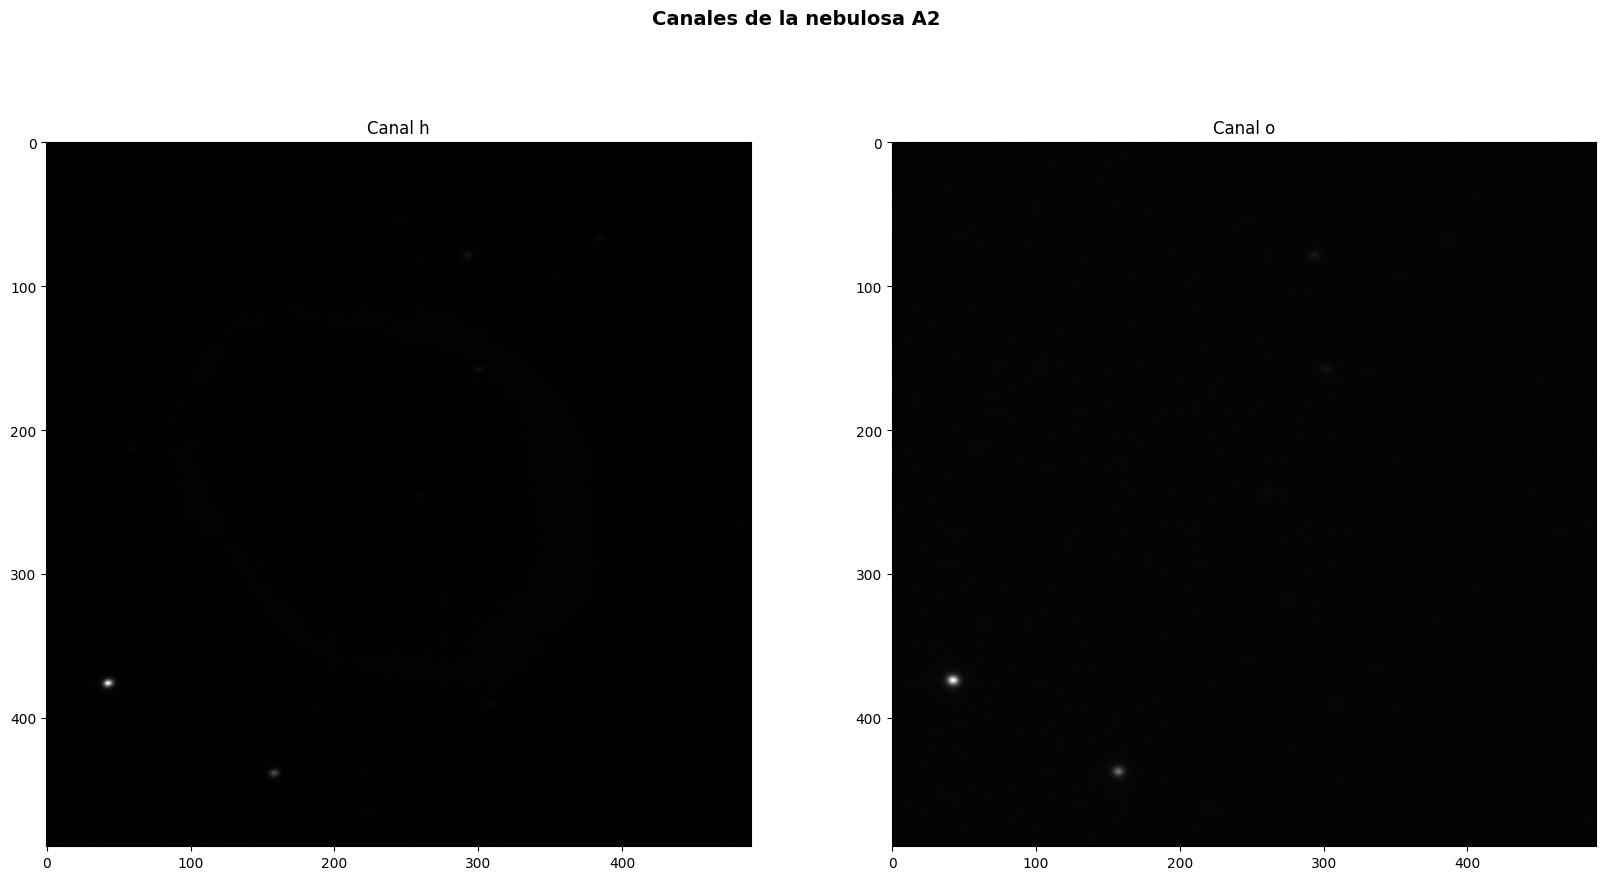

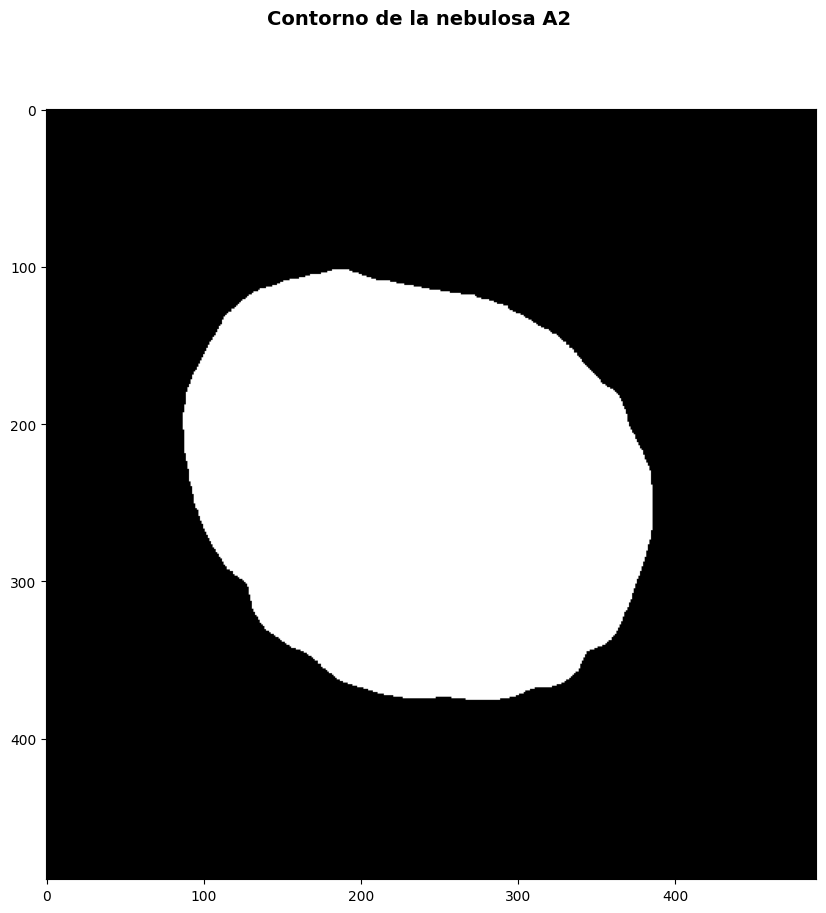

In [12]:
import matplotlib.pyplot as plt
num_images = len(canales)

fig, ax = plt.subplots(1, num_images, figsize=(10*num_images, 10))
fig.suptitle(f"Canales de la nebulosa A2", fontweight = 'bold', fontsize = 14)

for i, (key, channel) in enumerate(canales.items()):
    ax[i].imshow(channel, cmap = "gray")
    ax[i].set_title(f"Canal {key}")
fig.show()

if 'mask' in mascaras.keys():
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    fig.suptitle(f"Contorno y máscara de la nebulosa A2", fontweight = 'bold', fontsize = 14)

    ax[0].imshow(mascaras['contour'], cmap = "gray")
    ax[1].imshow(mascaras['mask'], cmap = "gray")
    fig.show()
else:
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    fig.suptitle(f"Contorno de la nebulosa A2", fontweight = 'bold', fontsize = 14)

    ax.imshow(mascaras['contour'], cmap = "gray")
    fig.show()

### 0.2. Preprocesado de los datos

Como parte del preprocesado inicial, vamos a hacer un estudio de cuales son los canales/filtros que comparten todas (o la mayoría de nebulosas) para así empezar a hacer pruebas con un conjunto de imágenes lo más homogéneo posible (para los canales).

In [13]:
for i in data_dict.keys():
    canales, mascaras = cargar_canales_nebulosa(i, data_dict, masks_dict, data_directory, masks_directory)
    if len(canales) != 2:
        print(i, len(canales))
    

C:\Users\Lucan\AppData\Local\Temp\ipykernel_21008\4066429206.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = io.imread("masks\\"+file)


A58 3
A71 1
h2 1
He1_1 3
He1_2 3
He1_3 3
He2_428 3
He2_429 3
He2_430 3
He2_432 3
He2_437 3
He2_447 3
He2_459 3


Las nebulosas que tienen 3 canales, las vamos a mantener (para comprobar que canales son los más comunes de entre H, O y N), las que solo tienen un canal, después de haber comprobado que no es un error de la programación, las vamos a descartar.

Vamos a comprobar que las nebulosas que tienen 2 o más canales diferentes, tengan mínimo dos en común y ver cuales son:

In [14]:
# Elimina del diccionario data_dict las nebulosas que no tienen minimo dos canales
data_dict = {nebula: files for nebula, files in data_dict.items() if len(files) >= 2}

cnt = {}
for i in data_dict.keys():
    canales, mascaras = cargar_canales_nebulosa(i, data_dict, masks_dict, data_directory, masks_directory)
    for key in canales.keys():
        if key in cnt.keys():
            cnt[key] += 1
        else:
            cnt[key] = 1

print(cnt)
    
    

C:\Users\Lucan\AppData\Local\Temp\ipykernel_21008\4066429206.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = io.imread("masks\\"+file)


{'h': 57, 'o': 53, 'b': 1, 'n': 13}


Como se puede observar, la mayoría de nebulosas tienen los canales 'h' y 'o', por lo que nos vamos a quedar con todas las imágenes que contienen al menos esos dos canales y vamos a empezar a trabajar con ellos.

In [15]:
new_data_dict = {}
for i in data_dict.keys():
    canales, mascaras, charge_files = cargar_canales_nebulosa(i, data_dict, masks_dict, data_directory, masks_directory, True)
    if 'h' in canales.keys() and 'o' in canales.keys():
        if 'n' in canales.keys():
            charge_files.pop('n')
        new_data_dict[i] = charge_files

print(f"El tamaño de data_dict es {len(data_dict)} y el tamaño de new_data_dict es {len(new_data_dict)}")

C:\Users\Lucan\AppData\Local\Temp\ipykernel_21008\4066429206.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = io.imread("masks\\"+file)


El tamaño de data_dict es 57 y el tamaño de new_data_dict es 53


Vamos a crear el diccionario definitivo con los archivos que vamos a cargar. Para esta prueba inicial, vamos a cargar como máscara única el archivo _mask si la nebulosa lo tiene y si no cargaremos el _contour.

In [16]:
for nebula, files in new_data_dict.items():
    mask = [file for file in masks_dict[nebula] if 'contour' in file][0]
    if len(masks_dict[nebula]) > 1:
        mask = [file for file in masks_dict[nebula] if 'mask' in file][0]
    new_data_dict[nebula].update({'mask': mask})
# Mostramos un ejemplo para ver que todo ha ido correctamente
print(new_data_dict[nebula])

{'h': 'He2_459hacee.fits', 'o': 'He2_459o3ce.fits', 'mask': 'He2_459_mask.png'}


Vamos a transformarlo a un dataframe de pandas para poder exportarlo a .csv y más adelante no tener que volver a hacer todo el procedimiento, además trabajar con dataframes de pandas puede ser mucho más accesible y fácil de visualizar.

In [17]:
import pandas as pd
df = pd.DataFrame.from_dict(new_data_dict, orient='index')

# Quiero cargar el nombre de la nebulosa como una columna y cambiarle el nombre de index a name
df.reset_index(inplace=True)
df.rename(columns={'index':'name'}, inplace=True)
print(df.head())

# Guardar el dataframe en un archivo csv
df.to_csv("data_files.csv", index=False)

  name              h             o             mask
0  A13    A13hcg.fits  A13o3cg.fits  A13_contour.png
1  A14     A14hc.fits   A14ocg.fits     A14_mask.png
2  A16  A16_Hacc.fits  A16_occ.fits  A16_contour.png
3  A18     A18hc.fits   A18ogc.fits     A18_mask.png
4  A19     A19hg.fits   A19ocg.fits     A19_mask.png


C:\Users\Lucan\AppData\Local\Temp\ipykernel_21008\3833823951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Llegados a este punto, a no ser que se amplie el dataset de imágenes, no vamos a tener que volver a ejecutar esta parte inicial.

## 1. Carga del Dataset
Vamos a definir una clase, que tome como base la clase Dataset de Tensorflow, para poder cargar todo nuestro conjunto de imágenes de 2 canales con su máscara correspondiente.

In [18]:
import os

print("Vamos a cambiar el directorio de trabajo")

# Indicamos la ruta del directorio de trabajo
route = "C:\\Users\\Lucan\\OneDrive - Universidade da Coruña\\Escritorio\\4_GCEID\\TFG\\test\\PNe_segmentation"
os.chdir(route)

current_directory = os.getcwd()
print("\nEl directorio actual es:", current_directory)

# Listamos el contenido del directorio
files = os.listdir(current_directory)
print("\nContenido del directorio actual:")
for file in files:
    print("\t",file)
    
# Listamos el contenido del directorio de las máscaras
masks_directory = "C:\\Users\\Lucan\\OneDrive - Universidade da Coruña\\Escritorio\\4_GCEID\\TFG\\test\\PNe_segmentation\\masks"
data_directory = "C:\\Users\\Lucan\\OneDrive - Universidade da Coruña\\Escritorio\\4_GCEID\\TFG\\test\\PNe_segmentation\\data"


Vamos a cambiar el directorio de trabajo

El directorio actual es: C:\Users\Lucan\OneDrive - Universidade da Coruña\Escritorio\4_GCEID\TFG\test\PNe_segmentation

Contenido del directorio actual:
	 data
	 data_files.csv
	 masks
	 segmentation_test.ipynb


In [19]:
import tensorflow as tf
from tf_fits.image import image_decode_fits as decode_fits
import matplotlib.pyplot as plt
import random as rd
import numpy as np
import os

class NebulaeDataset(tf.keras.utils.Sequence):
    def __init__(self, image_path, mask_path, dataframe, x_transform=None, x_transform_parameters={}, y_transform=None, y_transform_parameters={}, batch_size=1, max_normalize = 1):
        super(NebulaeDataset, self).__init__()
        
        self.image_path = image_path
        self.mask_path = mask_path
        
        self.batch_size = batch_size
        
        # Cargar los nombres de las imágenes y máscaras desde el dataframe
        self.data_dict = dataframe.set_index('name').to_dict(orient='index')

        # Filtrar las rutas de archivo según los nombres en el dataframe
        self.img_files = [(os.path.join(self.image_path, files['h']), os.path.join(self.image_path, files['o'])) for files in self.data_dict.values()]
        self.mask_files = [os.path.join(self.mask_path, files['mask']) for files in self.data_dict.values()]
        self.names = list(self.data_dict.keys())
        
        if x_transform:
            self.x_transform = x_transform
        else:
            self.x_transform = lambda x: (tf.convert_to_tensor(x) - np.min(x)) / (np.max(x) - np.min(x)) * max_normalize

        if y_transform:
            self.y_transform = y_transform
        else:
            self.y_transform = lambda y: (tf.cast((tf.convert_to_tensor(y) - np.min(y)) / (np.max(y) - np.min(y)), dtype=tf.int8))
        
        self.x_transform_parameters = x_transform_parameters
        self.y_transform_parameters = y_transform_parameters
    def __getitem__(self, index):
        
        img_paths = self.img_files[index*self.batch_size:(index+1)*self.batch_size]
        mask_paths = self.mask_files[index*self.batch_size:(index+1)*self.batch_size]
        names = self.names[index*self.batch_size:(index+1)*self.batch_size]
        
        batch_x = []
        batch_y = []
        batch_names = []
        for x_paths, y_path, name in zip(img_paths, mask_paths, names):
            image = []
            # Cargar la imagen y la máscara
            for x_path in x_paths:
                channel = tf.io.read_file(x_path)
                channel = decode_fits(channel, header=0)
                channel = np.flip(channel, axis=0)
                channel = self.x_transform(channel, **self.x_transform_parameters)
                # Necesito añadir una dimensión extra para que las imágenes sean de 3D
                image.append(tf.expand_dims(channel, axis=-1))
        
            mask = tf.io.read_file(y_path)
            mask = tf.image.decode_png(mask, channels=1)
            mask = self.y_transform(mask, **self.y_transform_parameters)
            
            batch_x.append(tf.concat(image, axis=-1))
            batch_y.append(mask)
            batch_names.append(name)
            
        return batch_x, batch_y, batch_names

    def __len__(self):
        return len(self.img_files) // self.batch_size
    
    def random_plot(self, index, plot_image = True, plot_mask = False):
        image, mask, name = self[index]
        rnd_choice = rd.choice(range(self.batch_size))
        if plot_image:
            fig, ax = plt.subplots(1, 2, figsize=(10, 5))
            fig.suptitle(f"Canales de la nebulosa {name[rnd_choice]}", fontweight = 'bold', fontsize = 14)
            ax[0].imshow(image[rnd_choice][:,:,0], cmap = "gray")
            ax[0].set_title(f"Canal H")
            ax[1].imshow(image[rnd_choice][:,:,1], cmap = "gray")
            ax[1].set_title(f"Canal O")
            fig.show()
        if plot_mask:
            fig, ax = plt.subplots(1, 1, figsize=(5, 5))
            fig.suptitle(f"Máscara de la nebulosa {name[rnd_choice]}", fontweight = 'bold', fontsize = 14)
            ax.imshow(mask[rnd_choice], cmap = "gray")
            fig.show()



Ahora deberíamos de ser capaces de poder cargar todas las imágenes, como tensores de TensorFlow, de nuestro csv como un Dataset

In [20]:
import pandas as pd
df = pd.read_csv("data_files.csv")
dataset = NebulaeDataset(data_directory, masks_directory, df)

C:\Users\Lucan\AppData\Local\Temp\ipykernel_21008\921303929.py:80: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\Lucan\AppData\Local\Temp\ipykernel_21008\921303929.py:85: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


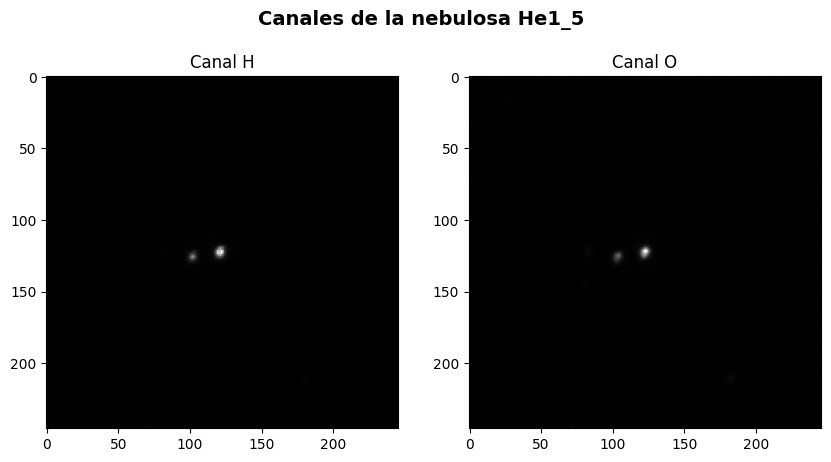

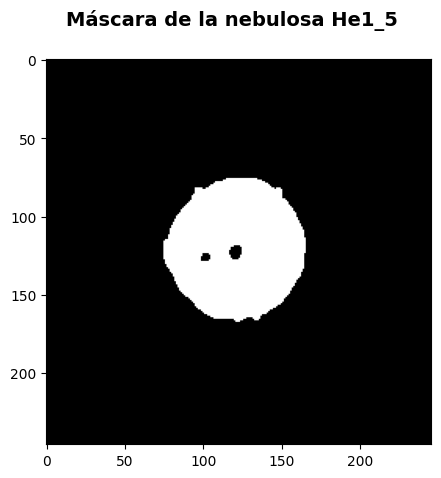

In [21]:
dataset.random_plot(44, plot_image = True, plot_mask = True)

## 2. Segmentación de las imágenes
Para la segmentación de las imágenes, vamos a probar diferentes algoritmos/técnicas propuestas por Diego Cantorna en el notebook de 'astrosegstem', pero para un mayor conjunto de datos para poder evaluarlas y verificar sus resultados.

### 2.0. Evaluación de resultados
Para evaluar el resultado de las técnicas de segmentación se pueden emplear distintas métricas.

Algunas de las métricas más utilizadas son la precisión, accuracy y recall, que junto al análisis de la matriz de confusión son las más utilizadas para cualquier problema de procesamiento de imágenes. A estas también se unen:
- **Coeficiente de Dice** (Dice Similarity Coefficient): Mide la similitud entre la segmentación predicha y la segmentación de referencia. Valores más cercanos a 1 indican una mejor superposición.
- **Índice de Jaccard** (Jaccard Index o Intersection over Union, IoU): Calcula la intersección entre la segmentación predicha y la segmentación de referencia dividida por su unión. También mide la superposición.
las cuales son métricas básicas y esenciales en los problemas de segmentación.

Vamos a utilizar todas estas métricas para evaluar nuestras técnicas de segmentación.

In [22]:
from sklearn import metrics
def dice_coef(y_true, y_pred, smooth=1):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred)
    dice = (2. * intersection + smooth) / (union + smooth)
    return dice

def evaluate_segmentation(mask, segmentation, confusion_matrix=False, verbose=False):
    mask = tf.reshape(mask, -1)
    segmentation = segmentation.ravel()
    # Calcular el índice de Jaccard
    jaccard = metrics.jaccard_score(mask, segmentation)
    # Calcular el índice de DICE
    dice = dice_coef(mask, segmentation)
    # Calcular el índice de precisión
    precision = metrics.precision_score(mask, segmentation)
    # Calcular el índice de sensibilidad
    recall = metrics.recall_score(mask, segmentation)
    # Calcular el accuracy
    accuracy = metrics.accuracy_score(mask, segmentation)

    conf_matrix = None
    
    if verbose:
        # Imprimir los resultados	
        print(f"Jaccard: {jaccard:.4f}\tDICE: {dice:.4f}\tPrecisión: {precision:.4f}\tSensibilidad: {recall:.4f}\n")
    
    if confusion_matrix:
        # Calcular la matriz de confusión
        conf_matrix = metrics.confusion_matrix(mask, segmentation)
        if verbose:
            print(' Verdaderos negativos (TN):', conf_matrix[0, 0])

            print(' Falsos positivos (FP):', conf_matrix[0, 1])

            print(' Falsos negativos (FN):', conf_matrix[1, 0])

            print(' Verdaderos positivos (TP):', conf_matrix[1, 1])
            print('\n')

        return jaccard, dice, accuracy, precision, recall, conf_matrix
    
    return jaccard, dice, accuracy, precision, recall, conf_matrix

### 2.1. Técnicas de agrupamiento de datos
Las técnicas de agrupamiento (clustering) tratan de encontrar una partición de un
conjunto de datos de forma que los elementos de un mismo grupo sean más similares
que los elementos de grupos distintos. Esto permite resumir un conjunto de datos,
y puede facilitar algunos procesos de visualización o análisis posteriores con otras
técnicas.

### 2.1. K-Means
Vamos a comenzar por la técnica más básica (y en la que se basan la mayoría), K-Means.

Para aplicar el algoritmo se selecciona el número de grupos a utilizar y un prototipo (elemento representativo) de cada grupo. A continuación se realiza un proceso iterativo en el que se van asignando datos al grupo más próximo, se recalcula el prototipo de cada grupo, y se repite el proceso hasta que se estabiliza. 

En este caso aplicaremos el algoritmo a los píxeles de imágenes de niveles de gris, por lo que el prototipo de cada grupo será el valor de un píxel. El número de grupos podemos establecerlo manualmente, realizando pruebas con distintos valores. Existen algoritmos más complejos que tratan de automatizar el proceso, pero es interesante familiarizarse inicialmente con las versiones más simples de los algoritmos, para centrar el estudio en los aspectos fundamentales.


Las pruebas con el K-Means van a ser realizadas de dos maneras distintas, un modelo K-Means para cada imagen (para ambos canales) y un modelo para cada canal (uno para h y otro para o y nos quedamos con el que mejor resultado da).

In [23]:
from sklearn.cluster import KMeans
def apply_KMeans(im, mask, name, plot=False, **kwargs):
    im_array = tf.reshape(im, (-1, 2))
    
    kmeans = KMeans(**kwargs).fit(im_array)
    
    # Obtenemos la imagen segmentada aplicando el algoritmo a cada píxel de la imagen.
    im_segm_array = kmeans.predict(im_array)

    # Cambiamos las dimensiones de los datos segmentados para que se correspondan con la imagen inicial. 
    im_segm = im_segm_array.reshape(im.shape[0], im.shape[1], 1)
    indices_grupos = np.argsort(kmeans.cluster_centers_.sum(axis=1))

    indice_nuevo = max(indices_grupos) + 1
    for indice_original in indices_grupos:
        im_segm[im_segm == indice_original] = indice_nuevo
        indice_nuevo += 1 
    
    im_segm_binaria = (im_segm == np.max(im_segm)).astype(int)
    
    if plot:
        # Podemos visualizar la imagen segmentada.
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle(f"Segmentación K-Means de la nebulosa {name}", fontweight = 'bold', fontsize = 14)
        ax[0].imshow(im_segm_binaria, cmap = "gray")
        ax[0].set_title(f"K-Means Segmentation")
        ax[1].imshow(mask, cmap = "gray")
        ax[1].set_title(f"Mask")
    
    return kmeans, im_segm_binaria

Probamos K-Means normalizando los datos entre 0 y 1 y sin normalizar.

Jaccard: 0.1705
DICE: 0.2267
Accuracy: 0.8335967435934567
Precisión: 0.2933
Sensibilidad: 0.3202



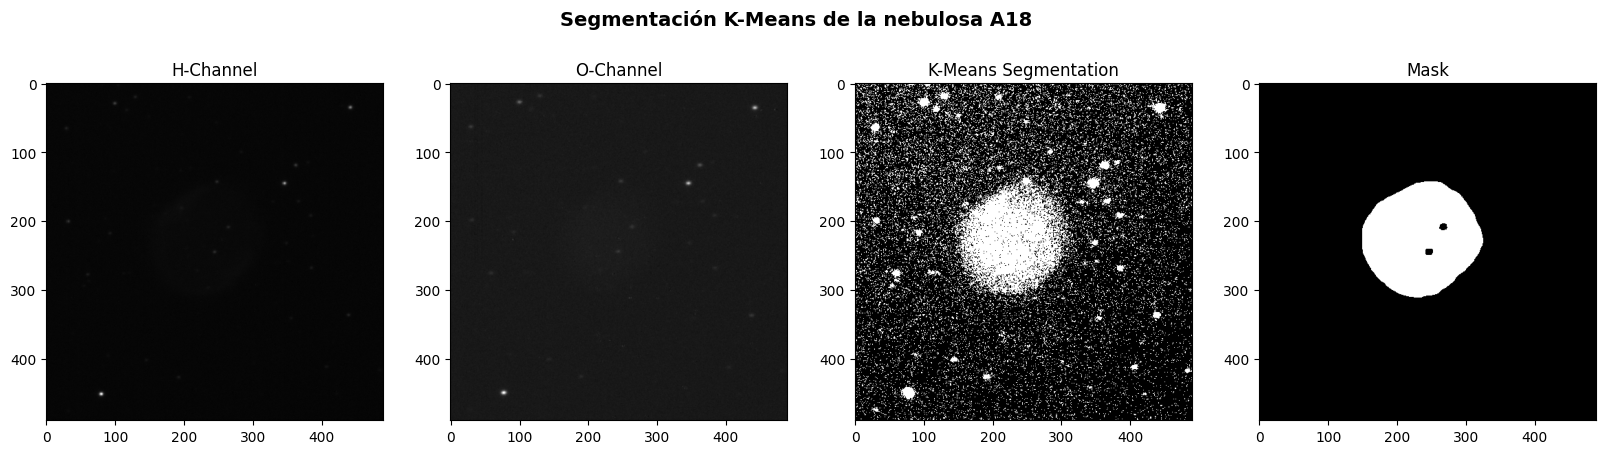

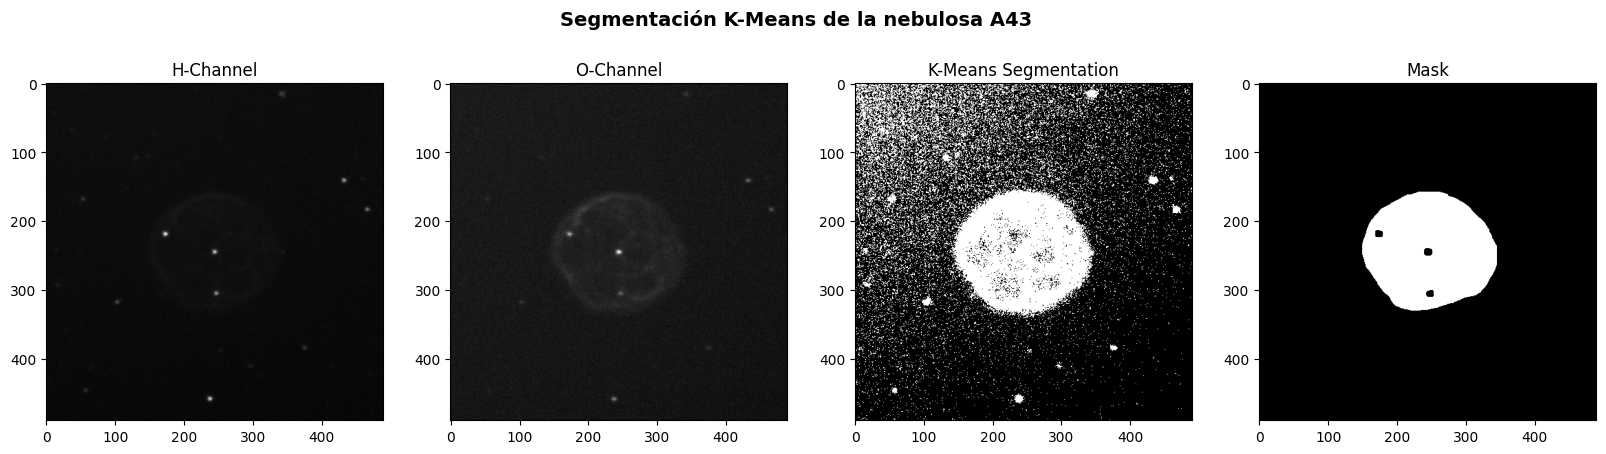

In [24]:
# Prueba normalizando los datos entre 0 y 1
dataset = NebulaeDataset(data_directory, masks_directory, df, batch_size=1)
results = {"jaccard":[], "dice":[], "accuracy":[], "precision":[], "recall":[]}

plot = False
plot_pne_name = ["A18", "A43"]

for im, mask, name in dataset:
    kmeans, im_segm = apply_KMeans(im[0], mask[0], name[0], plot=plot, n_clusters=2, max_iter=15, random_state=42)
    jaccard, dice, accuracy, precision, recall, _ = evaluate_segmentation(mask[0], im_segm, confusion_matrix=False, verbose = False)
    results["jaccard"].append(jaccard)
    results["dice"].append(dice)
    results["accuracy"].append(accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)

    if name[0] in plot_pne_name and not plot:
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))
        fig.suptitle(f"Segmentación K-Means de la nebulosa {name[0]}", fontweight = 'bold', fontsize = 14)
        ax[0].imshow(im[0][:,:,0], cmap = "gray")
        ax[0].set_title(f"H-Channel")
        ax[1].imshow(im[0][:,:,1], cmap = "gray")
        ax[1].set_title(f"O-Channel")
        ax[2].imshow(im_segm, cmap = "gray")
        ax[2].set_title(f"K-Means Segmentation")
        ax[3].imshow(mask[0], cmap = "gray")
        ax[3].set_title(f"Mask")
        
print(f"Jaccard: {np.mean(results['jaccard']):.4f}\nDICE: {np.mean(results['dice']):.4f}\nAccuracy: {np.mean(results['accuracy'])}\nPrecisión: {np.mean(results['precision']):.4f}\nSensibilidad: {np.mean(results['recall']):.4f}\n")

Jaccard: 0.1823
DICE: 0.2430
Accuracy: 0.890366749472908
Precisión: 0.3455
Sensibilidad: 0.2460



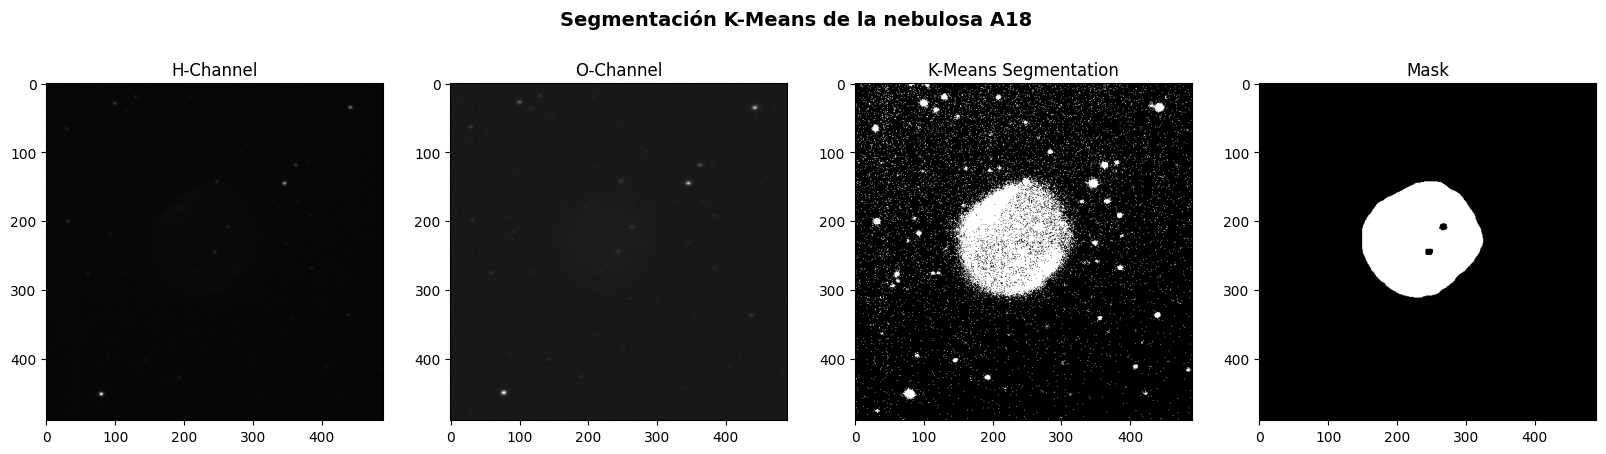

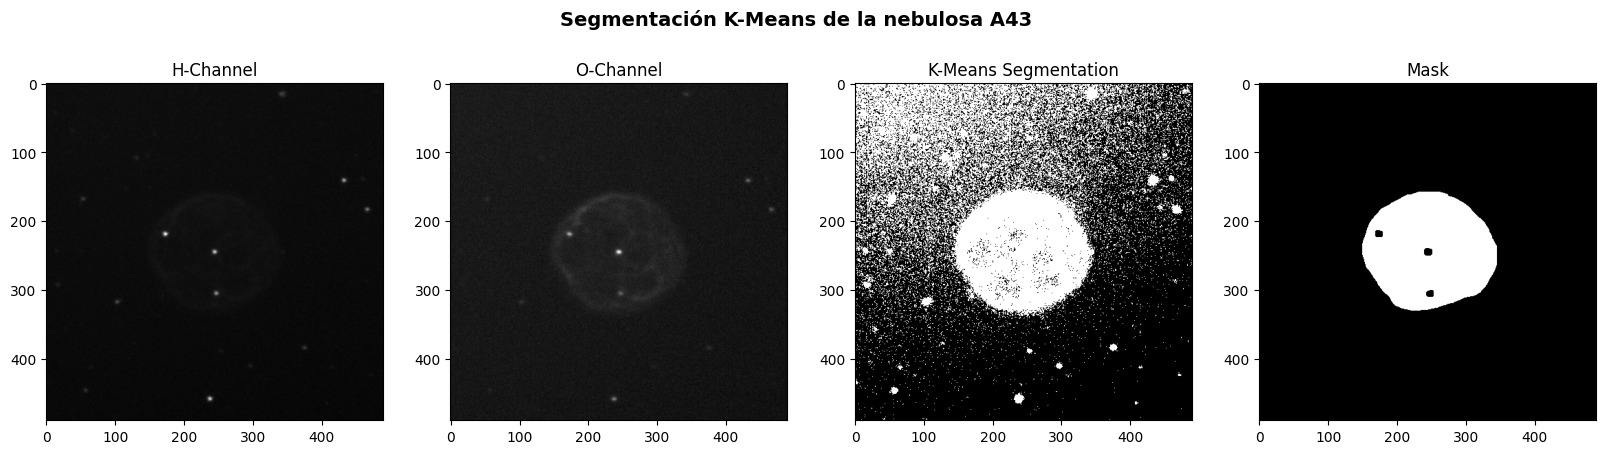

In [25]:
# Prueba sin normalizar los datos
transform = lambda x: tf.convert_to_tensor(x)

dataset = NebulaeDataset(data_directory, masks_directory, df, batch_size=1, x_transform = transform)
results = {"jaccard":[], "dice":[], "accuracy":[], "precision":[], "recall":[]}

plot = False
plot_pne_name = ["A18", "A43"]

for im, mask, name in dataset:
    kmeans, im_segm = apply_KMeans(im[0], mask[0], name[0], plot=plot, n_clusters=2, max_iter=15, random_state=42)
    jaccard, dice, accuracy, precision, recall, _ = evaluate_segmentation(mask[0], im_segm, confusion_matrix=False, verbose = False)
    results["jaccard"].append(jaccard)
    results["dice"].append(dice)
    results["accuracy"].append(accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)
    
    if name[0] in plot_pne_name and not plot:
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))
        fig.suptitle(f"Segmentación K-Means de la nebulosa {name[0]}", fontweight = 'bold', fontsize = 14)
        ax[0].imshow(im[0][:,:,0], cmap = "gray")
        ax[0].set_title(f"H-Channel")
        ax[1].imshow(im[0][:,:,1], cmap = "gray")
        ax[1].set_title(f"O-Channel")
        ax[2].imshow(im_segm, cmap = "gray")
        ax[2].set_title(f"K-Means Segmentation")
        ax[3].imshow(mask[0], cmap = "gray")
        ax[3].set_title(f"Mask")
        
print(f"Jaccard: {np.mean(results['jaccard']):.4f}\nDICE: {np.mean(results['dice']):.4f}\nAccuracy: {np.mean(results['accuracy'])}\nPrecisión: {np.mean(results['precision']):.4f}\nSensibilidad: {np.mean(results['recall']):.4f}\n")

Podemos observar que el funcionamiento del K-Means es algo mejor utilizando las imágenes originales sin normalizar.

### 2.2. Fuzzy C-Means (FCM)
Este algoritmo está basado en el anterior algoritmo, K-Means, pero a diferencia de el, se consideran grados de pertenencia difusos (en vez de aportar valores binarios, aporta un nivel de pertencencia entre 0 y 1).


Probamos FCM normalizando los datos entre 0 y 1 y sin normalizar.

In [26]:
import skfuzzy as fuzz

def apply_FCM(im, mask, name, plot=False, threshold = None, **kwargs):
    im_array = im.numpy().reshape(-1, 2).T
    
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data=im_array, **kwargs)
    
    # En primer lugar asociamos a cada píxel el cluster para el que tiene una mayor pertenencia. 
    clusters_array = np.argmax(u, axis=0)
    maximos = np.max(u, axis=0)
    
    # Cambiamos las dimensiones de los datos segmentados para que se correspondan con la imagen inicial.
    im_segm = clusters_array.reshape(im.shape[0], im.shape[1], 1)
    im_maxs = maximos.reshape(im.shape[0], im.shape[1], 1)
    
    indices_grupos = np.argsort(cntr.sum(axis=1))

    indice_nuevo = max(indices_grupos) + 1
    for indice_original in indices_grupos:
        im_segm[im_segm == indice_original] = indice_nuevo
        indice_nuevo += 1 
    
    im_segm_binaria = (im_segm == np.max(im_segm)).astype(int)
    
    if threshold:
        im_segm_binaria = im_segm_binaria * (im_maxs > threshold).astype(int)
        
    if plot:
        # Podemos visualizar la imagen segmentada.
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        fig.suptitle(f"Segmentación K-Means de la nebulosa {name}", fontweight = 'bold', fontsize = 14)
        ax[0].imshow(im_segm_binaria, cmap = "gray")
        ax[0].set_title(f"K-Means Segmentation")
        ax[1].imshow(mask, cmap = "gray")
        ax[1].set_title(f"Mask")
    
    return cntr, u, u0, d, jm, p, fpc, im_segm_binaria

Jaccard: 0.2712
DICE: 0.3722
Accuracy: 0.7800476986865919
Precisión: 0.3993
Sensibilidad: 0.6160



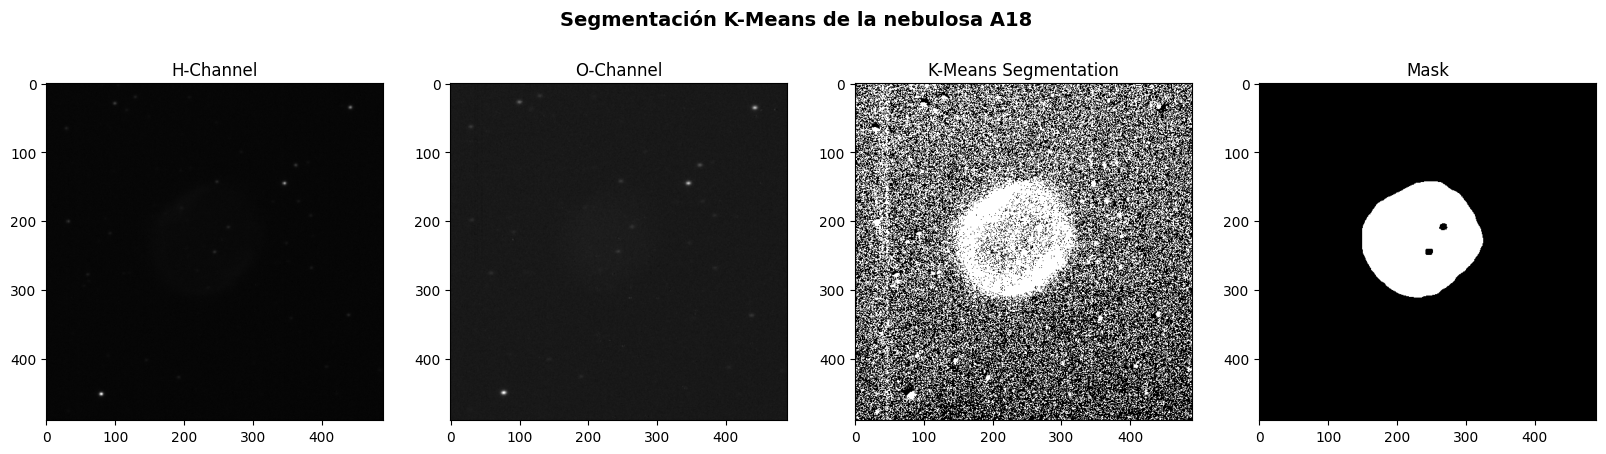

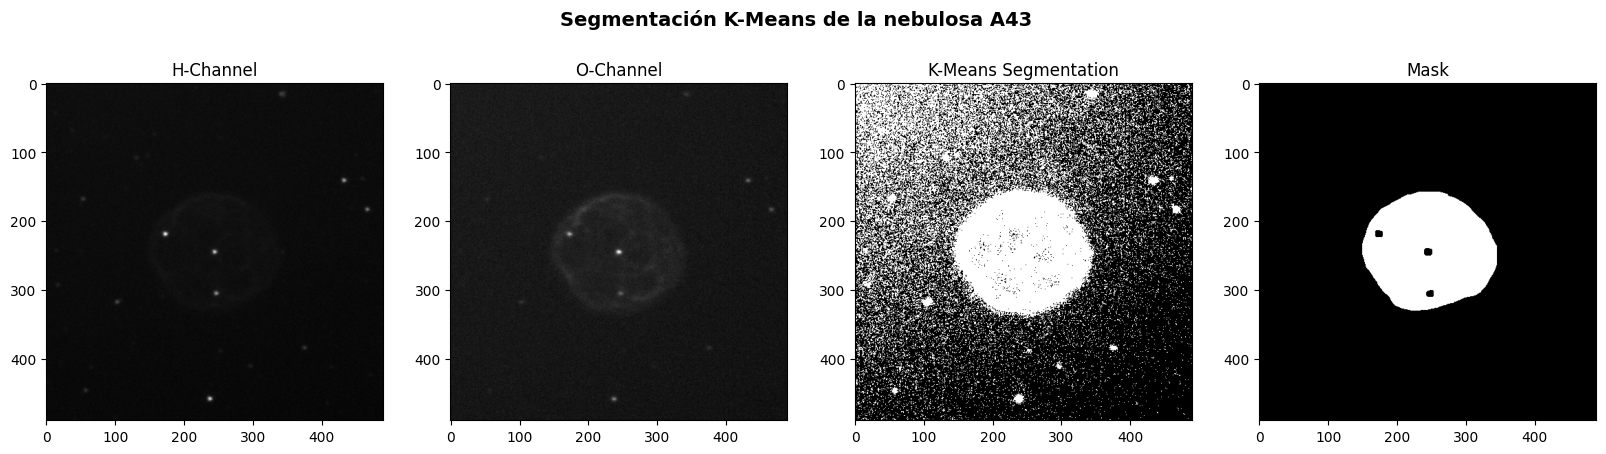

In [27]:
# Prueba normalizando los datos entre 0 y 1
dataset = NebulaeDataset(data_directory, masks_directory, df, batch_size=1)
results = {"jaccard":[], "dice":[], "accuracy":[], "precision":[], "recall":[]}

plot = False
plot_pne_name = ["A18", "A43"]

for im, mask, name in dataset:
    cntr, u, u0, d, jm, p, fpc, im_segm = apply_FCM(im[0], mask[0], name[0], plot=plot, c=2, m=2, error=0.005, maxiter=10, seed=42)
    jaccard, dice, accuracy, precision, recall, _ = evaluate_segmentation(mask[0], im_segm, confusion_matrix=False, verbose = False)
    results["jaccard"].append(jaccard)
    results["dice"].append(dice)
    results["accuracy"].append(accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)

    if name[0] in plot_pne_name and not plot:
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))
        fig.suptitle(f"Segmentación K-Means de la nebulosa {name[0]}", fontweight = 'bold', fontsize = 14)
        ax[0].imshow(im[0][:,:,0], cmap = "gray")
        ax[0].set_title(f"H-Channel")
        ax[1].imshow(im[0][:,:,1], cmap = "gray")
        ax[1].set_title(f"O-Channel")
        ax[2].imshow(im_segm, cmap = "gray")
        ax[2].set_title(f"K-Means Segmentation")
        ax[3].imshow(mask[0], cmap = "gray")
        ax[3].set_title(f"Mask")
        
print(f"Jaccard: {np.mean(results['jaccard']):.4f}\nDICE: {np.mean(results['dice']):.4f}\nAccuracy: {np.mean(results['accuracy'])}\nPrecisión: {np.mean(results['precision']):.4f}\nSensibilidad: {np.mean(results['recall']):.4f}\n")

Jaccard: 0.3067
DICE: 0.4177
Accuracy: 0.8482397372794458
Precisión: 0.4840
Sensibilidad: 0.5720



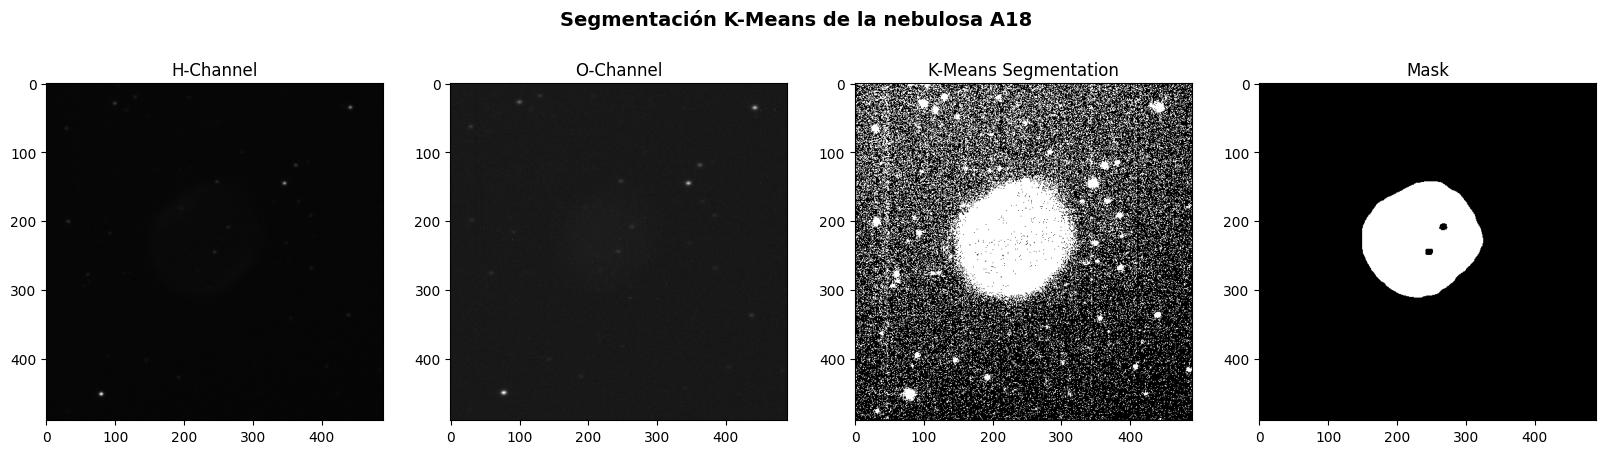

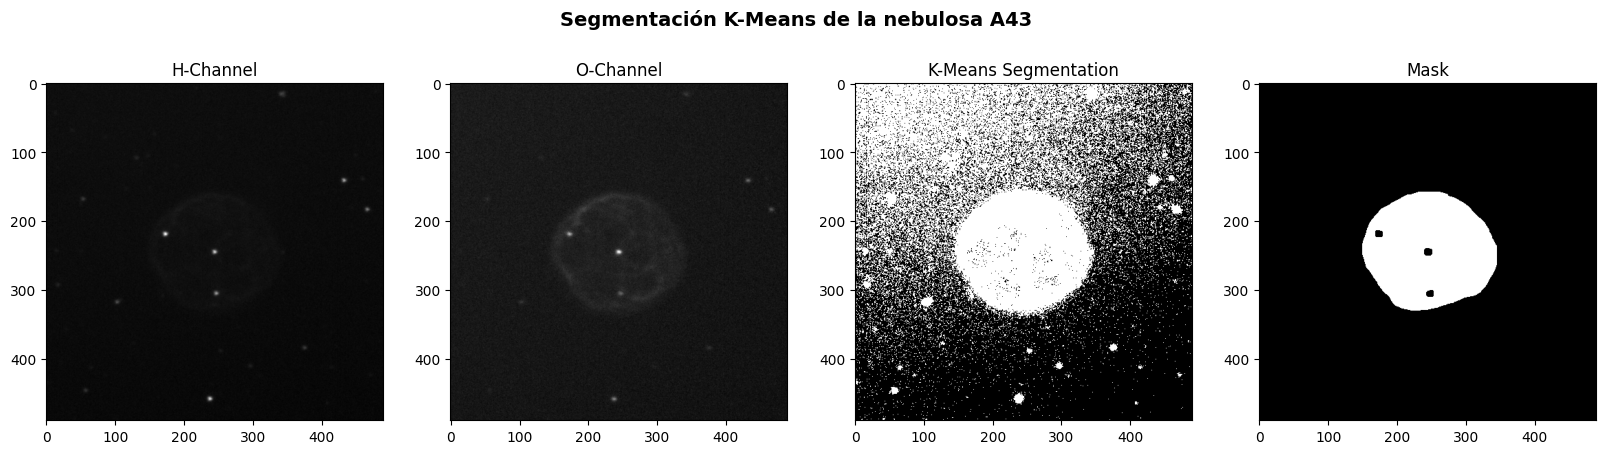

In [28]:
# Prueba sin normalizar los datos
transform = lambda x: tf.convert_to_tensor(x)

dataset = NebulaeDataset(data_directory, masks_directory, df, batch_size=1, x_transform=transform)
results = {"jaccard":[], "dice":[], "accuracy":[], "precision":[], "recall":[]}

plot = False
plot_pne_name = ["A18", "A43"]

for im, mask, name in dataset:
    cntr, u, u0, d, jm, p, fpc, im_segm = apply_FCM(im[0], mask[0], name[0], plot=plot, c=2, m=2, error=0.005, maxiter=10, seed=42)
    jaccard, dice, accuracy, precision, recall, _ = evaluate_segmentation(mask[0], im_segm, confusion_matrix=False, verbose = False)
    results["jaccard"].append(jaccard)
    results["dice"].append(dice)
    results["accuracy"].append(accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)

    if name[0] in plot_pne_name and not plot:
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))
        fig.suptitle(f"Segmentación K-Means de la nebulosa {name[0]}", fontweight = 'bold', fontsize = 14)
        ax[0].imshow(im[0][:,:,0], cmap = "gray")
        ax[0].set_title(f"H-Channel")
        ax[1].imshow(im[0][:,:,1], cmap = "gray")
        ax[1].set_title(f"O-Channel")
        ax[2].imshow(im_segm, cmap = "gray")
        ax[2].set_title(f"K-Means Segmentation")
        ax[3].imshow(mask[0], cmap = "gray")
        ax[3].set_title(f"Mask")
        
print(f"Jaccard: {np.mean(results['jaccard']):.4f}\nDICE: {np.mean(results['dice']):.4f}\nAccuracy: {np.mean(results['accuracy'])}\nPrecisión: {np.mean(results['precision']):.4f}\nSensibilidad: {np.mean(results['recall']):.4f}\n")

Hemos incluido un parámetro de threshold ya que el algoritmo FCM indica el grado de pertenencia a uno de los clusters, así podemos elegir que grado mínimo de pertenencia exigimos tener a un píxel para que se considere de nebulosa.

Jaccard: 0.2534
DICE: 0.3581
Accuracy: 0.8693249048148919
Precisión: 0.4861
Sensibilidad: 0.3771



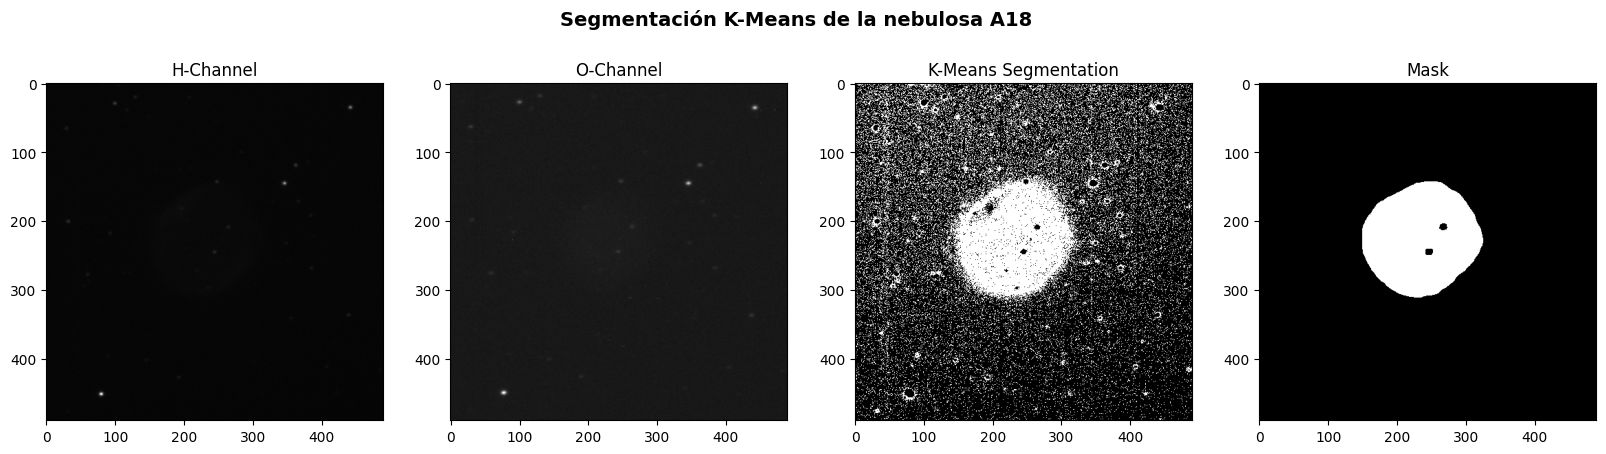

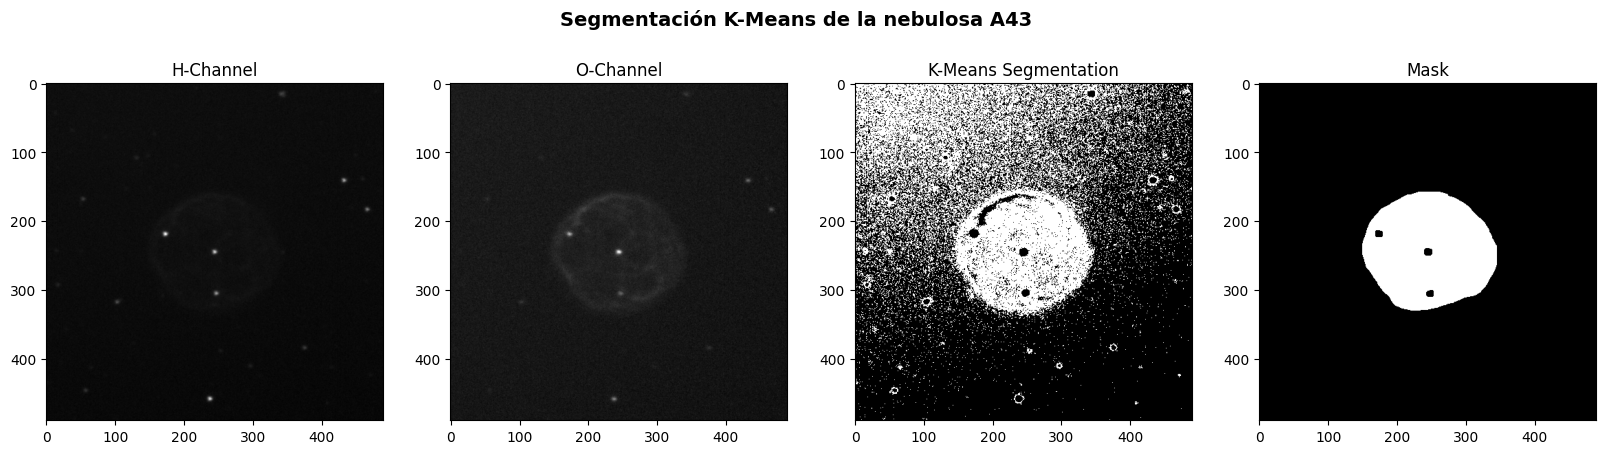

In [29]:
# Prueba sin normalizar los datos
transform = lambda x: tf.convert_to_tensor(x)

dataset = NebulaeDataset(data_directory, masks_directory, df, batch_size=1, x_transform=transform)
results = {"jaccard":[], "dice":[], "accuracy":[], "precision":[], "recall":[]}

plot = False
plot_pne_name = ["A18", "A43"]

for im, mask, name in dataset:
    cntr, u, u0, d, jm, p, fpc, im_segm = apply_FCM(im[0], mask[0], name[0], plot=plot, threshold=0.7, c=2, m=2, error=0.005, maxiter=10, seed=42)
    jaccard, dice, accuracy, precision, recall, _ = evaluate_segmentation(mask[0], im_segm, confusion_matrix=False, verbose = False)
    results["jaccard"].append(jaccard)
    results["dice"].append(dice)
    results["accuracy"].append(accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)

    if name[0] in plot_pne_name and not plot:
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))
        fig.suptitle(f"Segmentación K-Means de la nebulosa {name[0]}", fontweight = 'bold', fontsize = 14)
        ax[0].imshow(im[0][:,:,0], cmap = "gray")
        ax[0].set_title(f"H-Channel")
        ax[1].imshow(im[0][:,:,1], cmap = "gray")
        ax[1].set_title(f"O-Channel")
        ax[2].imshow(im_segm, cmap = "gray")
        ax[2].set_title(f"K-Means Segmentation")
        ax[3].imshow(mask[0], cmap = "gray")
        ax[3].set_title(f"Mask")
        
print(f"Jaccard: {np.mean(results['jaccard']):.4f}\nDICE: {np.mean(results['dice']):.4f}\nAccuracy: {np.mean(results['accuracy'])}\nPrecisión: {np.mean(results['precision']):.4f}\nSensibilidad: {np.mean(results['recall']):.4f}\n")

### 2.3. Preprocesado
En las técnicas probadas de agrupamiento de datos podemos ver como se consiguen ciertos resultados que son bastante interesantes. En la mayoría de imágenes donde la nebulosa es minimamente visible en alguno de los canales, las técnicas de agrupamiento de datos consiguen extraer de cierto modo el objeto que representa a la nebulosa pero con mucho ruido en general, el ruido se debe sobretodo a que las imágenes presentan un fondo con puntos brillantes de pequeño tamaño (casi siempre son estrellas). 

Para solucionar esto, vamos a plantear una etapa de preprocesado a las imágenes para conseguir extraer el objeto que representa a la nebulosa pero con la menor cantidad de ruido posible.

#### 2.3.1. Filtro Gaussiano
Podemos aplicar un filtro gaussiano a las imágenes para suavizar en general toda la imagen y tratar de reducir el ruido existense. Vamos a probar a visualizar algunas imágenes con distintos valores de sigma (parámetro que indica la desviación típica del kernel gaussiano) y probaremos con ellos sobre las técnicas de agrupamiento de datos (con la configuración que mejores resultados hemos obtenido de cada una).

Jaccard: 0.5386
DICE: 0.6469
Accuracy: 0.9124539345790016
Precisión: 0.6106
Sensibilidad: 0.7767



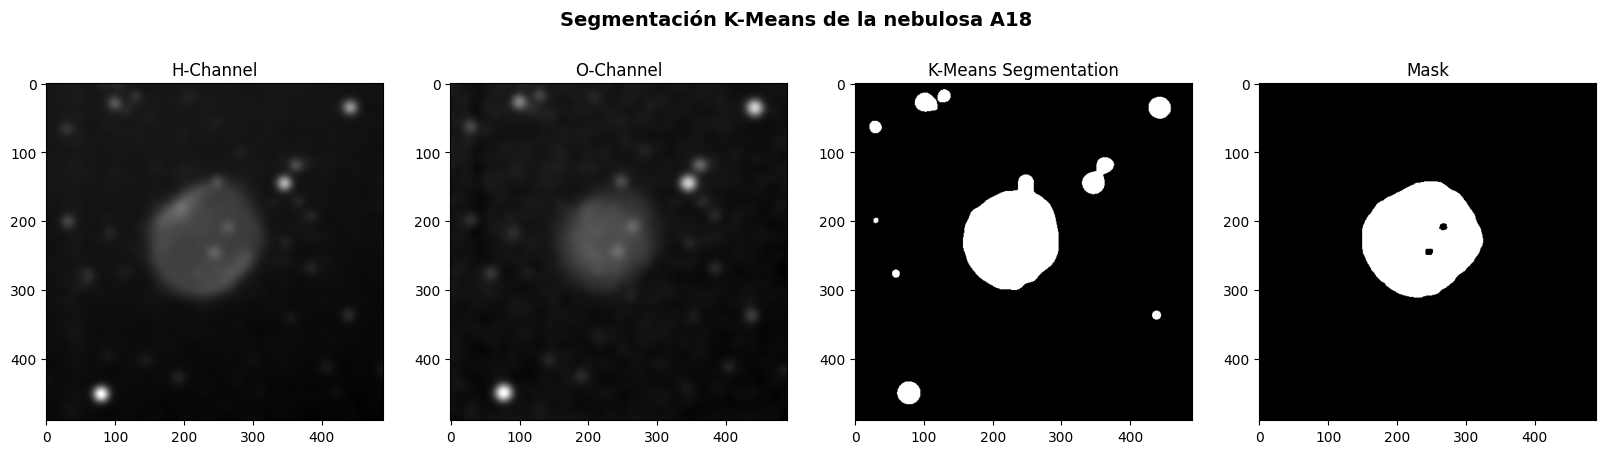

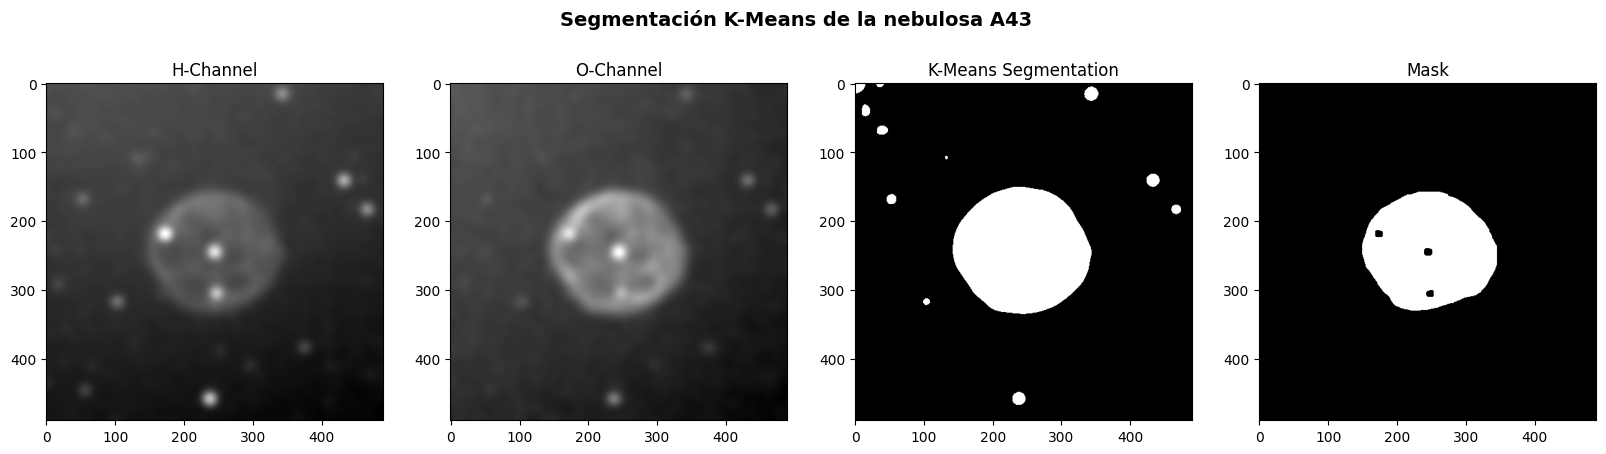

In [30]:
from scipy import ndimage
from skimage import exposure

# Definimos un pipeline de transformaciones para las imágenes
def transform(x, sigma, alpha = None, beta = None):
    x = tf.convert_to_tensor(x)
    # Aplicamos un filtro gaussiano a cada canal de la imagen
    x_filt = ndimage.gaussian_filter(x, sigma)
    x_filt[x == 0] = 0
    
    if beta and alpha:
        # Aumentamos el brillo y el contraste de la imagen (alpha es el parametro del brillo y beta el del contraste)
        # Ajustar el contraste utilizando la corrección gamma
        x_filt = exposure.adjust_gamma(x_filt, beta)

        # Ajustar el brillo utilizando la corrección logarítmica
        x_filt = exposure.adjust_log(x_filt, gain = alpha)
    
    return x_filt

# Prueba sin normalizar los datos
dataset = NebulaeDataset(data_directory, masks_directory, df, batch_size=1, x_transform = transform, x_transform_parameters = {'sigma': 7, 'alpha': 1.5, 'beta': 0.5})
results = {"jaccard":[], "dice":[], "accuracy":[], "precision":[], "recall":[]}

plot = False
plot_pne_name = ["A18", "A43"]

for im, mask, name in dataset:
    kmeans, im_segm = apply_KMeans(im[0], mask[0], name[0], plot=plot, n_clusters=2, max_iter=15, random_state=42)
    jaccard, dice, accuracy, precision, recall, _ = evaluate_segmentation(mask[0], im_segm, confusion_matrix=False, verbose = False)
    results["jaccard"].append(jaccard)
    results["dice"].append(dice)
    results["accuracy"].append(accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)
    
    if name[0] in plot_pne_name and not plot:
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))
        fig.suptitle(f"Segmentación K-Means de la nebulosa {name[0]}", fontweight = 'bold', fontsize = 14)
        ax[0].imshow(im[0][:,:,0], cmap = "gray")
        ax[0].set_title(f"H-Channel")
        ax[1].imshow(im[0][:,:,1], cmap = "gray")
        ax[1].set_title(f"O-Channel")
        ax[2].imshow(im_segm, cmap = "gray")
        ax[2].set_title(f"K-Means Segmentation")
        ax[3].imshow(mask[0], cmap = "gray")
        ax[3].set_title(f"Mask")
        
print(f"Jaccard: {np.mean(results['jaccard']):.4f}\nDICE: {np.mean(results['dice']):.4f}\nAccuracy: {np.mean(results['accuracy'])}\nPrecisión: {np.mean(results['precision']):.4f}\nSensibilidad: {np.mean(results['recall']):.4f}\n")

Jaccard: 0.5045
DICE: 0.6227
Accuracy: 0.8752090607760571
Precisión: 0.5706
Sensibilidad: 0.8044



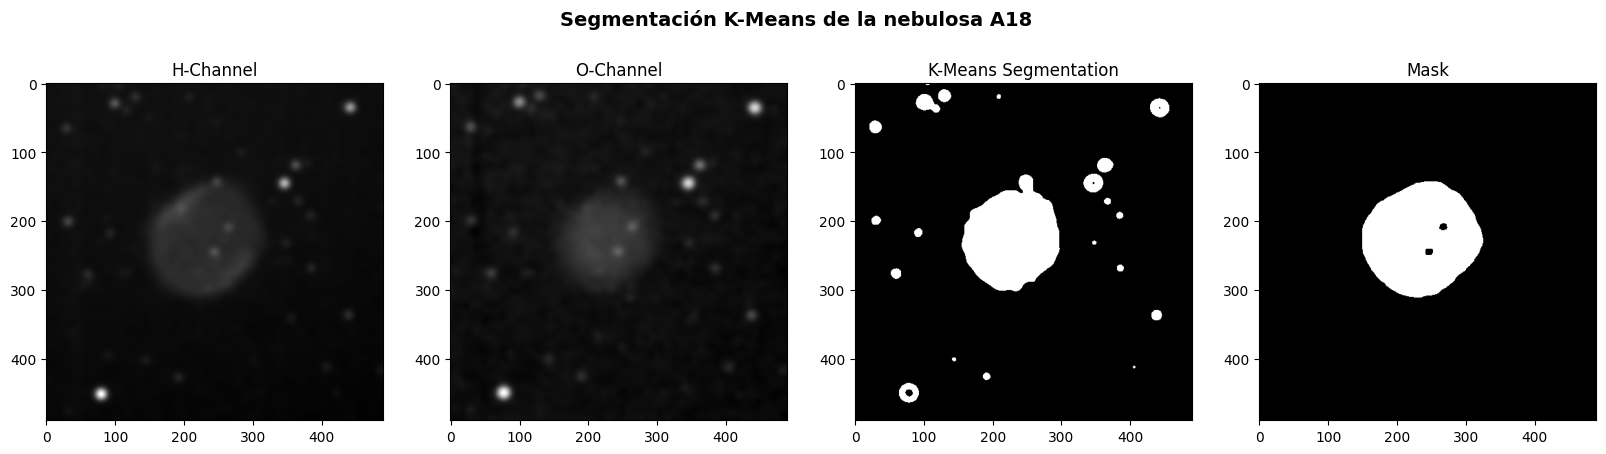

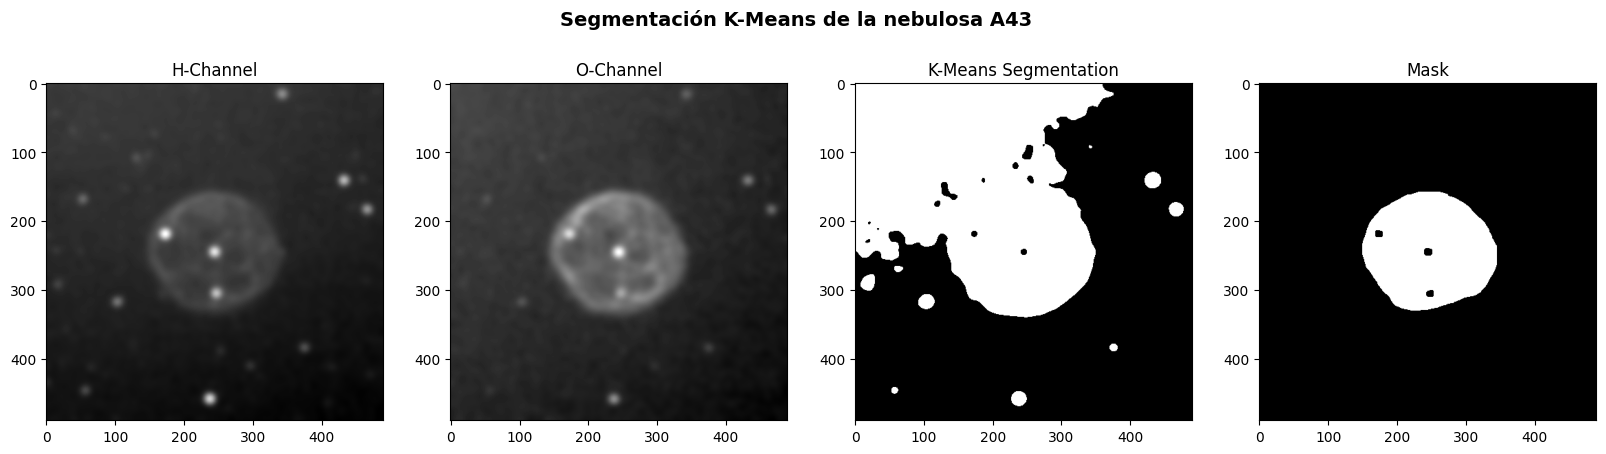

In [31]:
from scipy import ndimage
from skimage import exposure

# Definimos un pipeline de transformaciones para las imágenes
def transform(x, sigma, alpha = None, beta = None):
    x = tf.convert_to_tensor(x)
    # Aplicamos un filtro gaussiano a cada canal de la imagen
    x_filt = ndimage.gaussian_filter(x, sigma)
    x_filt[x == 0] = 0
    
    if beta and alpha:
        # Aumentamos el brillo y el contraste de la imagen (alpha es el parametro del brillo y beta el del contraste)
        # Ajustar el contraste utilizando la corrección gamma
        x_filt = exposure.adjust_gamma(x_filt, beta)

        # Ajustar el brillo utilizando la corrección logarítmica
        x_filt = exposure.adjust_log(x_filt, gain = alpha)
    
    return x_filt

# Prueba sin normalizar los datos
dataset = NebulaeDataset(data_directory, masks_directory, df, batch_size=1, x_transform = transform, x_transform_parameters = {'sigma': 5, 'alpha': 1.5, 'beta': 0.75})
results = {"jaccard":[], "dice":[], "accuracy":[], "precision":[], "recall":[]}

plot = False
plot_pne_name = ["A18", "A43"]

for im, mask, name in dataset:
    cntr, u, u0, d, jm, p, fpc, im_segm = apply_FCM(im[0], mask[0], name[0], plot=plot, threshold=0.6, c=2, m=2, error=0.005, maxiter=10, seed=42)
    jaccard, dice, accuracy, precision, recall, _ = evaluate_segmentation(mask[0], im_segm, confusion_matrix=False, verbose = False)
    results["jaccard"].append(jaccard)
    results["dice"].append(dice)
    results["accuracy"].append(accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)

    if name[0] in plot_pne_name and not plot:
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))
        fig.suptitle(f"Segmentación K-Means de la nebulosa {name[0]}", fontweight = 'bold', fontsize = 14)
        ax[0].imshow(im[0][:,:,0], cmap = "gray")
        ax[0].set_title(f"H-Channel")
        ax[1].imshow(im[0][:,:,1], cmap = "gray")
        ax[1].set_title(f"O-Channel")
        ax[2].imshow(im_segm, cmap = "gray")
        ax[2].set_title(f"K-Means Segmentation")
        ax[3].imshow(mask[0], cmap = "gray")
        ax[3].set_title(f"Mask")
        
print(f"Jaccard: {np.mean(results['jaccard']):.4f}\nDICE: {np.mean(results['dice']):.4f}\nAccuracy: {np.mean(results['accuracy'])}\nPrecisión: {np.mean(results['precision']):.4f}\nSensibilidad: {np.mean(results['recall']):.4f}\n")

#### 2.3.2. Procesado morfológico
Podemos utilizar técnicas de procesado morfológico para tratar de detectar el fondo de estrellas de las imagenes y tratar de eliminar de cierta manera algunas de las mismas para facilitar a nuestros algoritmos a segmentar de mejor manera.

Jaccard: 0.3000
DICE: 0.4100
Accuracy: 0.8438951844449392
Precisión: 0.5782
Sensibilidad: 0.5116



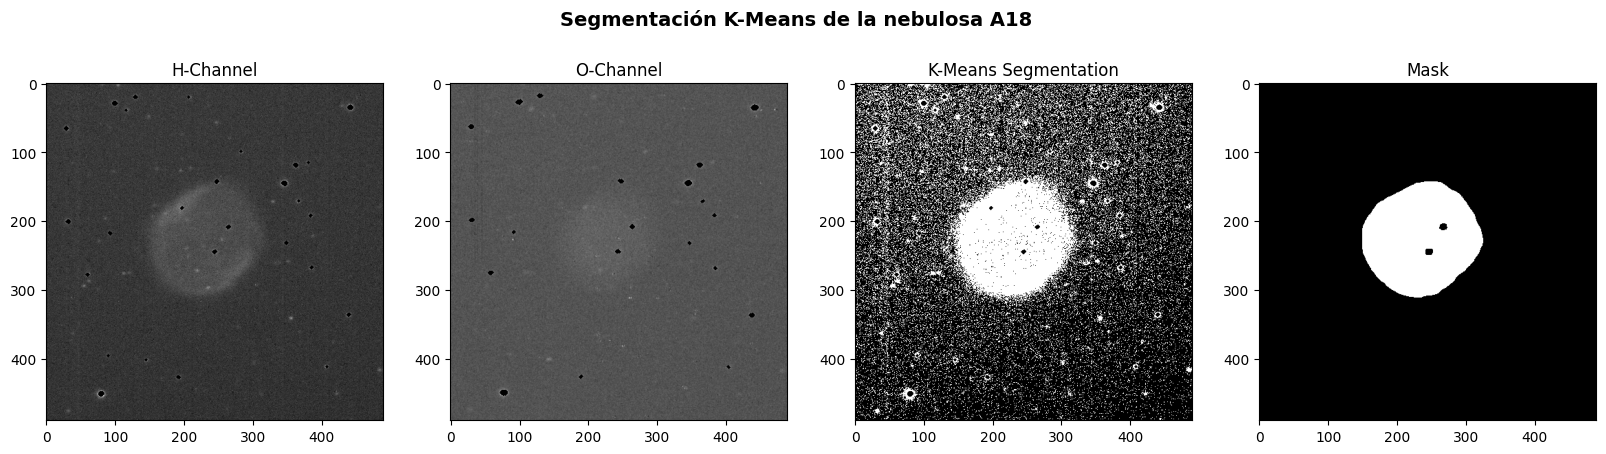

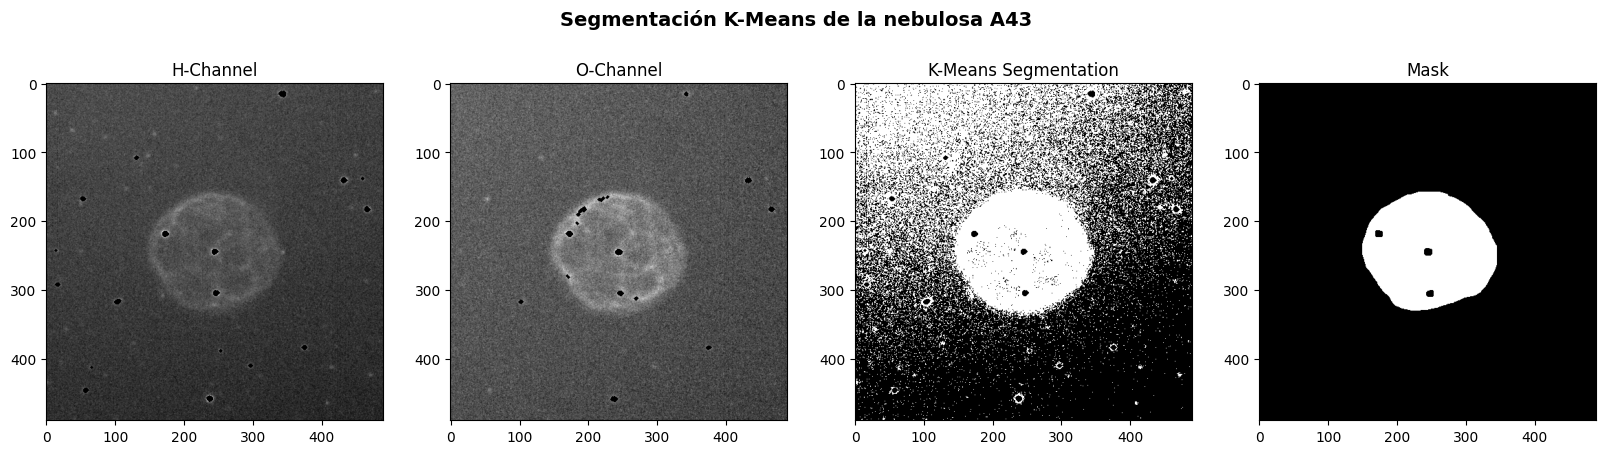

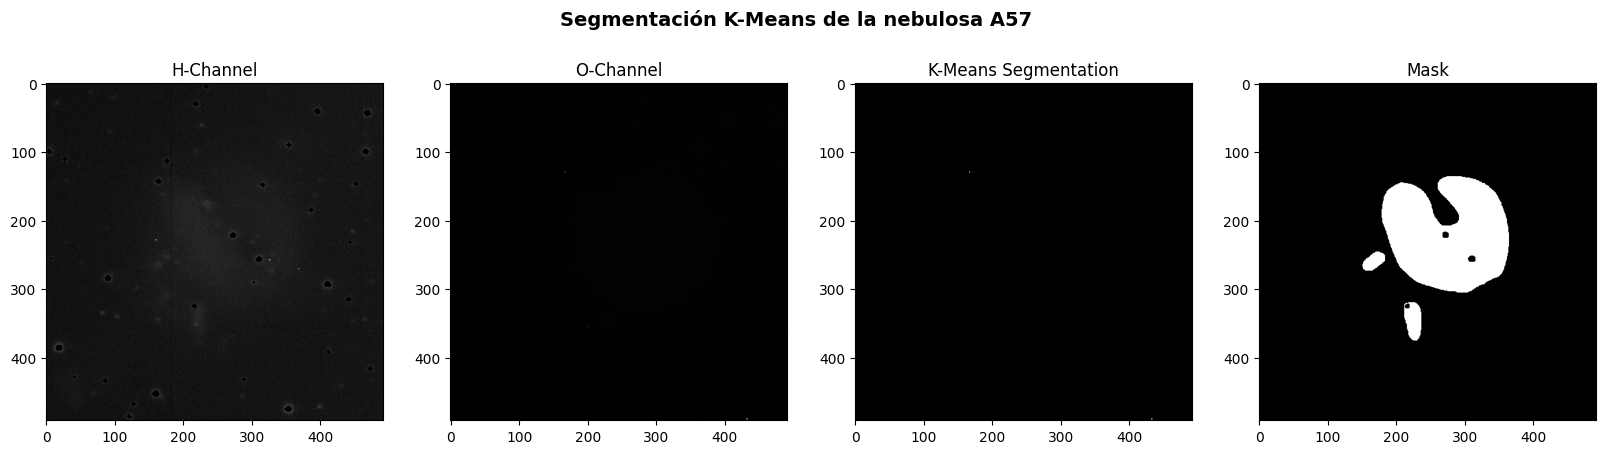

In [73]:
from scipy import ndimage
from skimage import exposure, morphology

# Definimos un pipeline de transformaciones para las imágenes
def transform(x, sigma, radius):
    x = tf.convert_to_tensor(x)
    x_preproc = np.copy(x)
    # Aplicamos un filtro gaussiano a cada canal de la imagen
    x_filt = ndimage.gaussian_filter(x, sigma)
    x_filt[x == 0] = 0
    
    # Puede ser interesante hacer pruebas con otros valores para ver cómo afecta al resultado.
    x_zonas_claras_peq = x > (x_filt + np.std(x))
    
    # Obtenemos la representación de un disco de radio 1.
    # Puede ser interesante hacer pruebas con otros valores del radio del disco para ver cómo afecta al resultado.
    selem = morphology.disk(radius = radius)
    
    x_zonas_claras_peq = ndimage.binary_opening(input=x_zonas_claras_peq, structure=selem)
    
    x_preproc = (x_preproc - np.min(x_preproc))
    x_preproc[x_zonas_claras_peq] = 0
    
    return x_preproc

# Prueba sin normalizar los datos
dataset = NebulaeDataset(data_directory, masks_directory, df, batch_size=1, x_transform = transform, x_transform_parameters = {'sigma': 7, 'radius': 2})
results = {"jaccard":[], "dice":[], "accuracy":[], "precision":[], "recall":[]}

plot = False
plot_pne_name = ["A18", "A43", "A57"]

for im, mask, name in dataset:
    kmeans, im_segm = apply_KMeans(im[0], mask[0], name[0], plot=plot, n_clusters=2, max_iter=15, random_state=42)
    jaccard, dice, accuracy, precision, recall, _ = evaluate_segmentation(mask[0], im_segm, confusion_matrix=False, verbose = False)
    results["jaccard"].append(jaccard)
    results["dice"].append(dice)
    results["accuracy"].append(accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)
    
    if name[0] in plot_pne_name and not plot:
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))
        fig.suptitle(f"Segmentación K-Means de la nebulosa {name[0]}", fontweight = 'bold', fontsize = 14)
        ax[0].imshow(im[0][:,:,0], cmap = "gray")
        ax[0].set_title(f"H-Channel")
        ax[1].imshow(im[0][:,:,1], cmap = "gray")
        ax[1].set_title(f"O-Channel")
        ax[2].imshow(im_segm, cmap = "gray")
        ax[2].set_title(f"K-Means Segmentation")
        ax[3].imshow(mask[0], cmap = "gray")
        ax[3].set_title(f"Mask")
        
print(f"Jaccard: {np.mean(results['jaccard']):.4f}\nDICE: {np.mean(results['dice']):.4f}\nAccuracy: {np.mean(results['accuracy'])}\nPrecisión: {np.mean(results['precision']):.4f}\nSensibilidad: {np.mean(results['recall']):.4f}\n")

También podemos combinar ambas técnicas para comprobar su funcionamiento, primero intentamos eliminar de cierto modo las estrellas gracias a los operadores morfológicos y después suavizamos la imagen con un filtro gaussiano para terminar de eliminar el ruido

Jaccard: 0.5959
DICE: 0.7028
Accuracy: 0.9012806175765996
Precisión: 0.6537
Sensibilidad: 0.8702



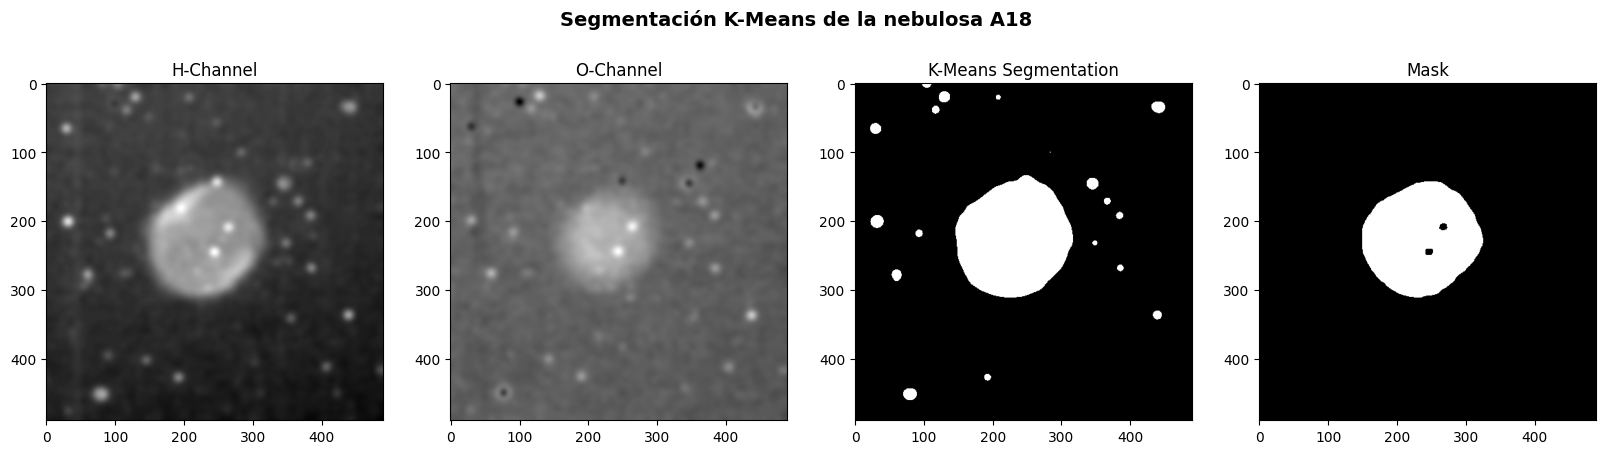

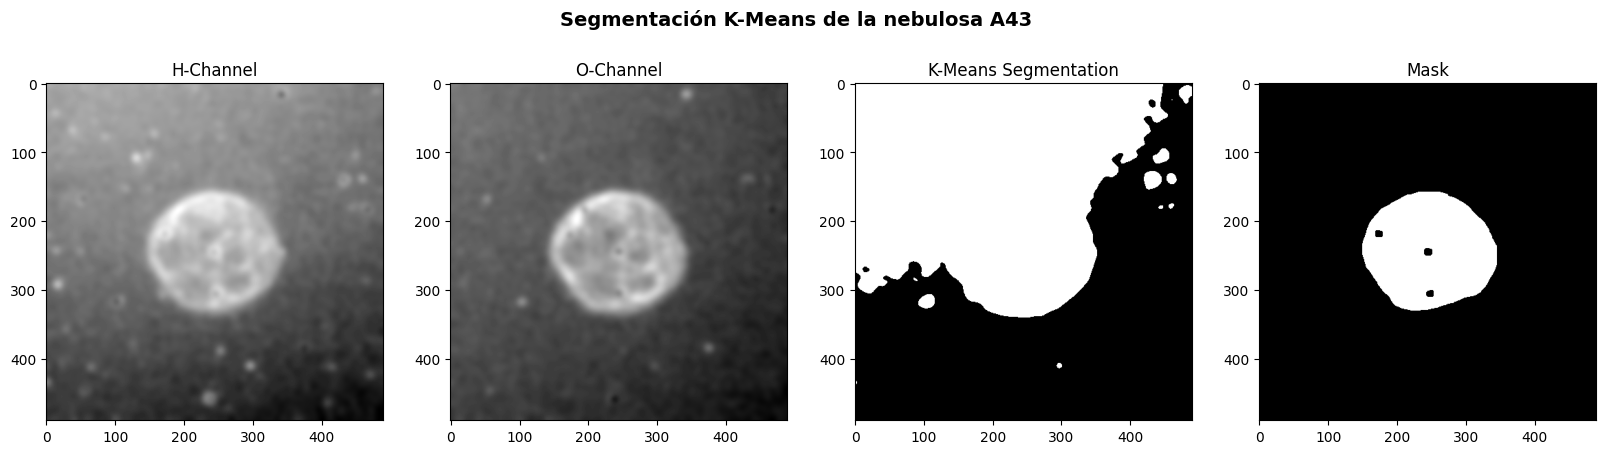

In [78]:
from scipy import ndimage
from skimage import exposure, morphology

# Definimos un pipeline de transformaciones para las imágenes
def transform(x, sigma_morph, sigma_gauss, radius, alpha = None, beta = None):
    x = tf.convert_to_tensor(x)
    x_preproc = np.copy(x)
    # Aplicamos un filtro gaussiano a cada canal de la imagen
    x_filt = ndimage.gaussian_filter(x, sigma_morph)
    x_filt[x == 0] = 0
    
    # Puede ser interesante hacer pruebas con otros valores para ver cómo afecta al resultado.
    x_zonas_claras_peq = x > (x_filt + np.std(x))
    
    # Obtenemos la representación de un disco de radio 1.
    # Puede ser interesante hacer pruebas con otros valores del radio del disco para ver cómo afecta al resultado.
    selem = morphology.disk(radius = radius)
    
    x_zonas_claras_peq = ndimage.binary_opening(input=x_zonas_claras_peq, structure=selem)
     
    x_preproc = (x_preproc - np.min(x_preproc))
    x_preproc[x_zonas_claras_peq] = 0
    
    x_filt = ndimage.gaussian_filter(x_preproc, sigma_gauss)
    x_filt[x == 0] = 0
    
    if beta and alpha:
        # Aumentamos el brillo y el contraste de la imagen (alpha es el parametro del brillo y beta el del contraste)
        # Ajustar el contraste utilizando la corrección gamma
        x_filt = exposure.adjust_gamma(x_filt, beta)

        # Ajustar el brillo utilizando la corrección logarítmica
        x_filt = exposure.adjust_log(x_filt, gain = alpha)
    
    return x_filt

# Prueba sin normalizar los datos
dataset = NebulaeDataset(data_directory, masks_directory, df, batch_size=1, x_transform = transform, x_transform_parameters = {'sigma_morph': 5, 'sigma_gauss': 5, 'radius': 3, 'alpha': 1.5, 'beta': 0.75})
results = {"jaccard":[], "dice":[], "accuracy":[], "precision":[], "recall":[]}

plot = False
plot_pne_name = ["A18", "A43"]

for im, mask, name in dataset:
    kmeans, im_segm = apply_KMeans(im[0], mask[0], name[0], plot=plot, n_clusters=2, max_iter=15, random_state=42)
    jaccard, dice, accuracy, precision, recall, _ = evaluate_segmentation(mask[0], im_segm, confusion_matrix=False, verbose = False)
    results["jaccard"].append(jaccard)
    results["dice"].append(dice)
    results["accuracy"].append(accuracy)
    results["precision"].append(precision)
    results["recall"].append(recall)
    
    if name[0] in plot_pne_name and not plot:
        fig, ax = plt.subplots(1, 4, figsize=(20, 5))
        fig.suptitle(f"Segmentación K-Means de la nebulosa {name[0]}", fontweight = 'bold', fontsize = 14)
        ax[0].imshow(im[0][:,:,0], cmap = "gray")
        ax[0].set_title(f"H-Channel")
        ax[1].imshow(im[0][:,:,1], cmap = "gray")
        ax[1].set_title(f"O-Channel")
        ax[2].imshow(im_segm, cmap = "gray")
        ax[2].set_title(f"K-Means Segmentation")
        ax[3].imshow(mask[0], cmap = "gray")
        ax[3].set_title(f"Mask")
        
print(f"Jaccard: {np.mean(results['jaccard']):.4f}\nDICE: {np.mean(results['dice']):.4f}\nAccuracy: {np.mean(results['accuracy'])}\nPrecisión: {np.mean(results['precision']):.4f}\nSensibilidad: {np.mean(results['recall']):.4f}\n")

## 3. Modelos de Machine Learning
En este apartado, vamos a ver algunos modelos de Machine Learning (ML), como pequeños autoencoders definidos por nosotros o algún modelo al que le podamos aplicar Transfer Learning para aprovecharnos de su arquitectura, los cuales nos pueden ser de gran utilidad a la hora de segmentar nuestras imágenes.

### 3.1. Autoencoders
Los autoencoder son redes neuronales (RRNN) que se pueden aplicar a diversas tareas de aprendizajes no supervisados. La capa de entrada y la capa de salida de un autoencoder tienen las mismas dimensiones debido a que el objetivo de estos es tratar de reconstruir la imagen de entrada después de haber pasado por un proceso de downsampling y por otro de upsampling. En la siguiente imagen se puede ver la arquitectura/funcionamiento de un autoencoder básico.

![autoencoder.png](images/autoencoder.png)

Como se puede observar, un autoencoder consta de 2 partes, un codificador y un decodificador. El codificador (o encoder) va a intentar reducir a un espacio latente toda la información de la imagen de la cual, más adelante, el decodificador va a intentar reconstruir la imagen original a partir de ese espacio latente representativo.

Los autoencoder que vamos a utilizar, debido a que estamos trabajando con imágenes, son los autoencoders convolucionales (arquitectura de autoencoder pero con capas convolucionales).

Como tenemos imágenes de distintos tamaños, vamos a procesar las imágenes en bloques (relativamente pequeños), con las dimensiones correspondientes para la entrada del autoencoder, para no tener ningún problema a la hora de introducir las imágenes en nuestro modelo.
